## Cargar Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
# Load datos
path_datos = os.path.join('Datos','Originales')
filename = os.path.join(path_datos,'cancellation_data.csv')
df = pd.read_csv(filename)
df['is_cancelled'] = df['status'] == 'cancelled'
#print(df.head())

## Libere Graficos

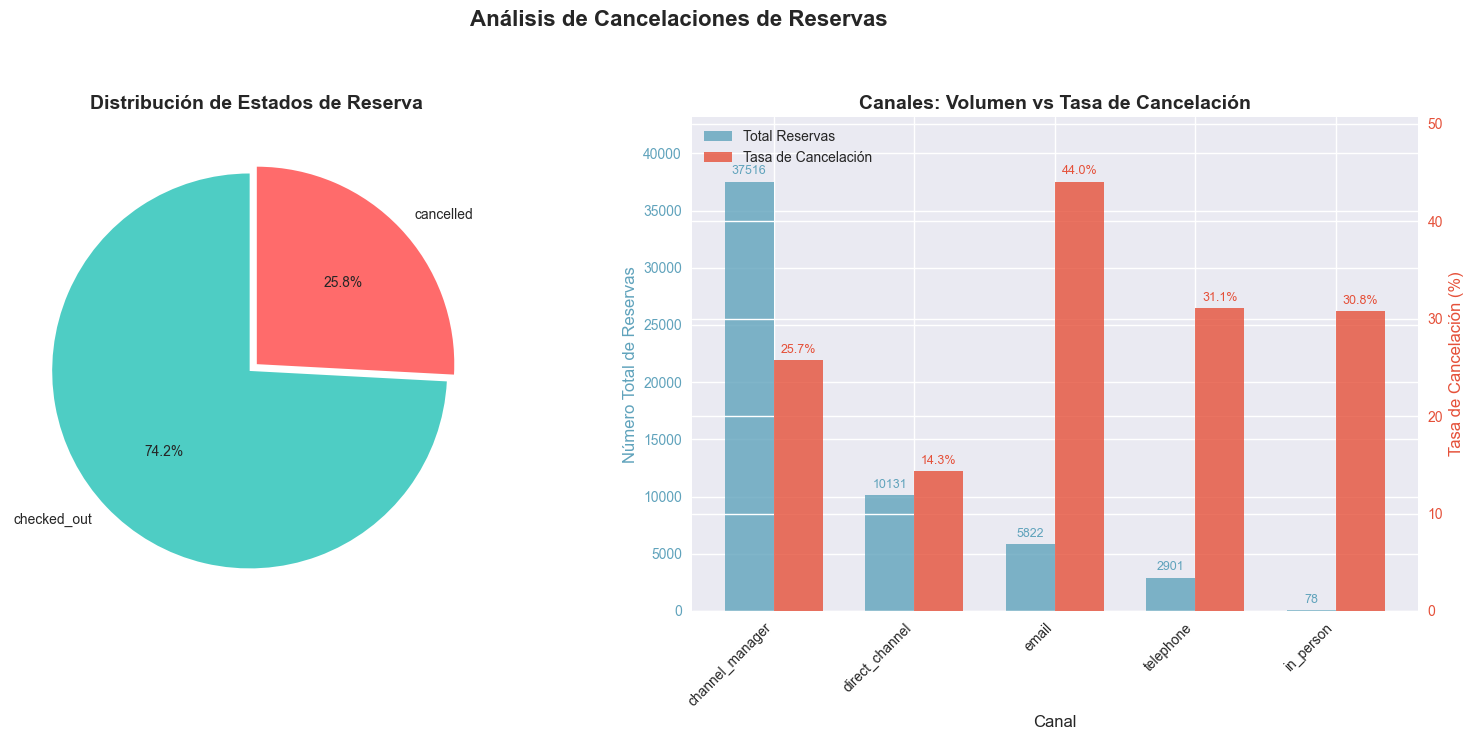


RESUMEN DE CANALES (Top 8 por volumen)
                 Total Reservas  Tasa Cancelación (%)  % del Total
origin                                                            
channel_manager           37516                  25.7         66.5
direct_channel            10131                  14.3         17.9
email                      5822                  44.0         10.3
telephone                  2901                  31.1          5.1
in_person                    78                  30.8          0.1

Resumen general:
- Total de reservas analizadas: 56448
- Tasa general de cancelación: 25.8%
- Número de canales únicos: 5


In [3]:
# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar datos
path_datos = os.path.join('Datos', 'Originales')
filename = os.path.join(path_datos, 'cancellation_data.csv')
df = pd.read_csv(filename)
df['is_cancelled'] = df['status'] == 'cancelled'

# Crear figura con 2 subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# ==============================================
# GRÁFICO 1: Pie chart de estados de reserva
# ==============================================
status_counts = df['status'].value_counts()
colors = ['#4ecdc4', '#ff6b6b']  # Verde para checked_out, Rojo para cancelled
axes[0].pie(status_counts.values, labels=status_counts.index, 
            autopct='%1.1f%%', colors=colors, startangle=90, explode=[0.05, 0])
axes[0].set_title('Distribución de Estados de Reserva', fontsize=14, fontweight='bold')

# ==============================================
# GRÁFICO 2: Canales - Volumen vs Tasa de Cancelación
# ==============================================
if 'origin' in df.columns:
    # Obtener los top 8 canales por volumen
    top_channels = df['origin'].value_counts().head(8).index.tolist()
    
    # Filtrar datos solo para los canales top
    df_top = df[df['origin'].isin(top_channels)]
    
    # Calcular métricas por canal
    channel_stats = pd.DataFrame({
        'total_reservations': df_top['origin'].value_counts(),
        'cancellation_rate': df_top.groupby('origin')['is_cancelled'].mean() * 100
    }).reindex(top_channels)  # Ordenar según el volumen
    
    # Crear el gráfico de barras agrupadas
    x = range(len(channel_stats))
    width = 0.35
    
    # Barras para volumen de reservas (eje izquierdo)
    ax1 = axes[1]
    bars1 = ax1.bar([i - width/2 for i in x], channel_stats['total_reservations'], 
                   width, label='Total Reservas', color='#60a3bc', alpha=0.8)
    ax1.set_xlabel('Canal', fontsize=12)
    ax1.set_ylabel('Número Total de Reservas', fontsize=12, color='#60a3bc')
    ax1.tick_params(axis='y', labelcolor='#60a3bc')
    ax1.set_xticks(x)
    ax1.set_xticklabels(channel_stats.index, rotation=45, ha='right', fontsize=10)
    
    # Crear segundo eje Y para tasa de cancelación
    ax2 = ax1.twinx()
    bars2 = ax2.bar([i + width/2 for i in x], channel_stats['cancellation_rate'], 
                   width, label='Tasa de Cancelación', color='#e55039', alpha=0.8)
    ax2.set_ylabel('Tasa de Cancelación (%)', fontsize=12, color='#e55039')
    ax2.tick_params(axis='y', labelcolor='#e55039')
    
    # Añadir valores en las barras
    for i, (v1, v2) in enumerate(zip(channel_stats['total_reservations'], 
                                     channel_stats['cancellation_rate'])):
        # Valor en barras de volumen
        ax1.text(i - width/2, v1 + max(channel_stats['total_reservations'])*0.01, 
                str(int(v1)), ha='center', va='bottom', fontsize=9, color='#60a3bc')
        # Valor en barras de tasa de cancelación
        ax2.text(i + width/2, v2 + max(channel_stats['cancellation_rate'])*0.01, 
                f'{v2:.1f}%', ha='center', va='bottom', fontsize=9, color='#e55039')
    
    # Combinar leyendas
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)
    
    ax1.set_title('Canales: Volumen vs Tasa de Cancelación', fontsize=14, fontweight='bold')
    
    # Ajustar límites del eje Y para mejor visualización
    ax1.set_ylim([0, max(channel_stats['total_reservations']) * 1.15])
    ax2.set_ylim([0, max(channel_stats['cancellation_rate']) * 1.15])
    
else:
    # Si no existe la columna 'origin'
    axes[1].text(0.5, 0.5, 'Columna "origin" no encontrada\nen los datos', 
                ha='center', va='center', fontsize=12, transform=axes[1].transAxes)
    axes[1].set_title('Canales: Volumen vs Tasa de Cancelación', fontsize=14, fontweight='bold')

# Ajustar layout
plt.suptitle('Análisis de Cancelaciones de Reservas', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# ==============================================
# TABLA ADICIONAL: Datos de los canales
# ==============================================
if 'origin' in df.columns:
    print("\n" + "="*60)
    print("RESUMEN DE CANALES (Top 8 por volumen)")
    print("="*60)
    
    channel_summary = pd.DataFrame({
        'Total Reservas': channel_stats['total_reservations'].astype(int),
        'Tasa Cancelación (%)': channel_stats['cancellation_rate'].round(1),
        '% del Total': (channel_stats['total_reservations'] / len(df) * 100).round(1)
    })
    
    print(channel_summary)
    print("\nResumen general:")
    print(f"- Total de reservas analizadas: {len(df)}")
    print(f"- Tasa general de cancelación: {(df['is_cancelled'].sum() / len(df) * 100):.1f}%")
    print(f"- Número de canales únicos: {df['origin'].nunique()}")

ESTADÍSTICAS DE RAZONES DE CANCELACIÓN
Total de cancelaciones: 14588
Cancelaciones con 'refuse_to_detail': 9040 (62.0%)
Cancelaciones analizadas (sin 'refuse_to_detail'): 5548

Distribución de razones (excluyendo 'refuse_to_detail'):
  • series_group_cancelled: 1417 (25.5%)
  • payment_missed: 1395 (25.1%)
  • no_show: 732 (13.2%)
  • changed_plans: 664 (12.0%)
  • other: 575 (10.4%)
  • duplicated: 142 (2.6%)
  • technical_error: 127 (2.3%)
  • force_majeure: 115 (2.1%)
  • mistake: 100 (1.8%)
  • found_better_location: 84 (1.5%)


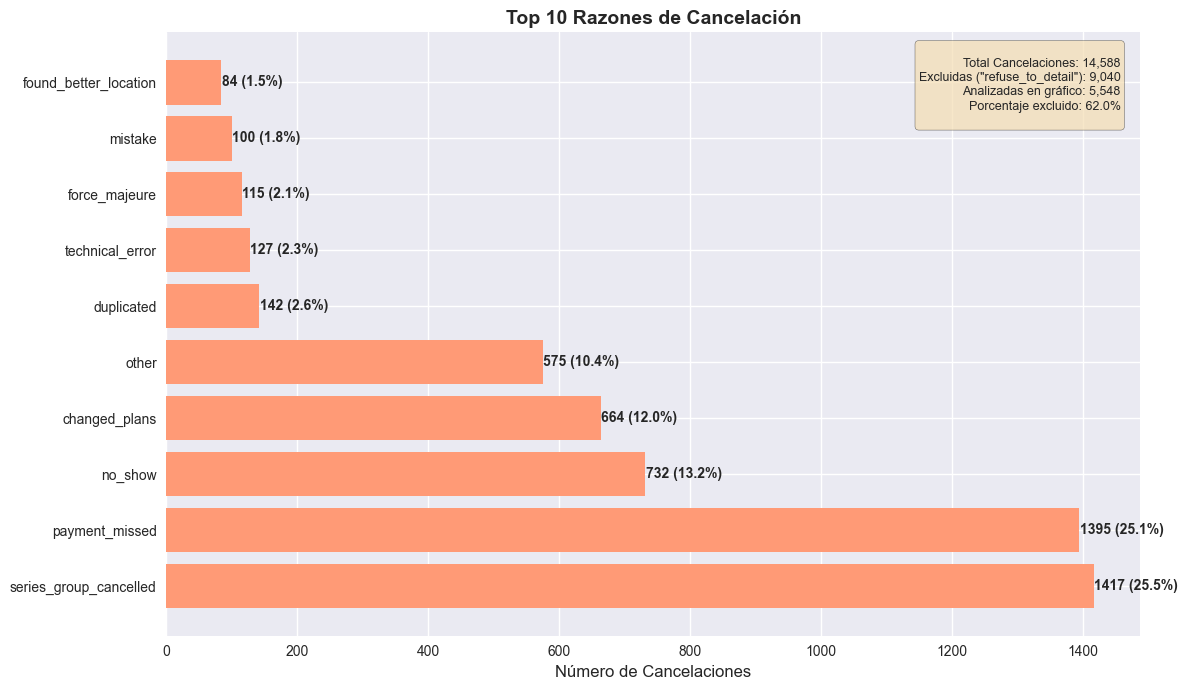

In [4]:
# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar datos
path_datos = os.path.join('Datos','Originales')
filename = os.path.join(path_datos,'cancellation_data.csv')
df = pd.read_csv(filename)
df['is_cancelled'] = df['status'] == 'cancelled'

# Filtrar solo cancelaciones
cancelled_df = df[df['is_cancelled'] == True]

# GRÁFICO 2: Razones de Cancelación (excluyendo refuse_to_detail)
plt.figure(figsize=(12, 7))

if 'cancellation_reason' in cancelled_df.columns and not cancelled_df.empty:
    # Excluir 'refuse_to_detail' del análisis
    cancelled_filtered = cancelled_df[cancelled_df['cancellation_reason'] != 'refuse_to_detail']
    
    if not cancelled_filtered.empty:
        # Contar razones (excluyendo refuse_to_detail)
        reason_counts = cancelled_filtered['cancellation_reason'].value_counts()
        
        # Tomar top 10 (o menos si hay menos razones)
        top_n = min(10, len(reason_counts))
        reason_counts = reason_counts.head(top_n)
        
        # Crear gráfico de barras horizontales
        bars = plt.barh(range(len(reason_counts)), reason_counts.values, color='#ff9a76')
        plt.yticks(range(len(reason_counts)), reason_counts.index)
        plt.xlabel('Número de Cancelaciones', fontsize=12)
        plt.title(f'Top {top_n} Razones de Cancelación', 
                  fontsize=14, fontweight='bold')
        
        # Añadir valores en las barras
        for i, (bar, count) in enumerate(zip(bars, reason_counts.values)):
            percentage = (count / len(cancelled_filtered)) * 100
            plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                    f'{count} ({percentage:.1f}%)',
                    va='center', fontsize=10, fontweight='bold')
        
        # Estadísticas - MOVIDO A LA DERECHA
        total_cancelled = len(cancelled_df)
        total_refused = (cancelled_df['cancellation_reason'] == 'refuse_to_detail').sum()
        total_filtered = len(cancelled_filtered)
        
        stats_text = f'''
Total Cancelaciones: {total_cancelled:,}
Excluidas ("refuse_to_detail"): {total_refused:,}
Analizadas en gráfico: {total_filtered:,}
Porcentaje excluido: {(total_refused/total_cancelled*100):.1f}%
        '''
        
        # Mover a la parte derecha superior (coordenadas 0.98, 0.98 significa 98% a la derecha, 98% arriba)
        plt.text(0.98, 0.98, stats_text,
                 transform=plt.gca().transAxes, fontsize=9,
                 verticalalignment='top',
                 horizontalalignment='right',  # Alineado a la derecha
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))
        
        # También mostrar en consola
        print("="*60)
        print("ESTADÍSTICAS DE RAZONES DE CANCELACIÓN")
        print("="*60)
        print(f"Total de cancelaciones: {total_cancelled}")
        print(f"Cancelaciones con 'refuse_to_detail': {total_refused} ({(total_refused/total_cancelled*100):.1f}%)")
        print(f"Cancelaciones analizadas (sin 'refuse_to_detail'): {total_filtered}")
        print("\nDistribución de razones (excluyendo 'refuse_to_detail'):")
        for reason, count in reason_counts.items():
            percentage = (count / total_filtered) * 100
            print(f"  • {reason}: {count} ({percentage:.1f}%)")
    
    else:
        print("⚠️ No hay datos de razones de cancelación después de excluir 'refuse_to_detail'")
        
        # Mostrar distribución original para referencia
        if 'cancellation_reason' in cancelled_df.columns:
            print("\nDistribución original (incluyendo 'refuse_to_detail'):")
            original_counts = cancelled_df['cancellation_reason'].value_counts()
            for reason, count in original_counts.head(10).items():
                percentage = (count / len(cancelled_df)) * 100
                print(f"  • {reason}: {count} ({percentage:.1f}%)")
            
            # Crear gráfico con todas las razones (incluyendo refuse_to_detail)
            original_counts_top = original_counts.head(10)
            bars = plt.barh(range(len(original_counts_top)), original_counts_top.values, color='#ff9a76')
            plt.yticks(range(len(original_counts_top)), original_counts_top.index)
            plt.xlabel('Número de Cancelaciones', fontsize=12)
            plt.title('Top 10 Razones de Cancelación (todas)', fontsize=14, fontweight='bold')
            
            for i, (bar, count) in enumerate(zip(bars, original_counts_top.values)):
                percentage = (count / len(cancelled_df)) * 100
                plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                        f'{count} ({percentage:.1f}%)',
                        va='center', fontsize=10)
            
            # Marcar refuse_to_detail en rojo si está presente
            if 'refuse_to_detail' in original_counts_top.index:
                idx = list(original_counts_top.index).index('refuse_to_detail')
                bars[idx].set_color('#ff0000')
                bars[idx].set_alpha(0.8)
                
                # Texto movido a la derecha
                plt.text(0.98, 0.98, "⚠️ 'refuse_to_detail' marcado en rojo",
                         transform=plt.gca().transAxes, fontsize=10,
                         verticalalignment='top',
                         horizontalalignment='right',
                         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))
else:
    print("⚠️ No hay datos de razones de cancelación disponibles")

plt.tight_layout()
plt.show()

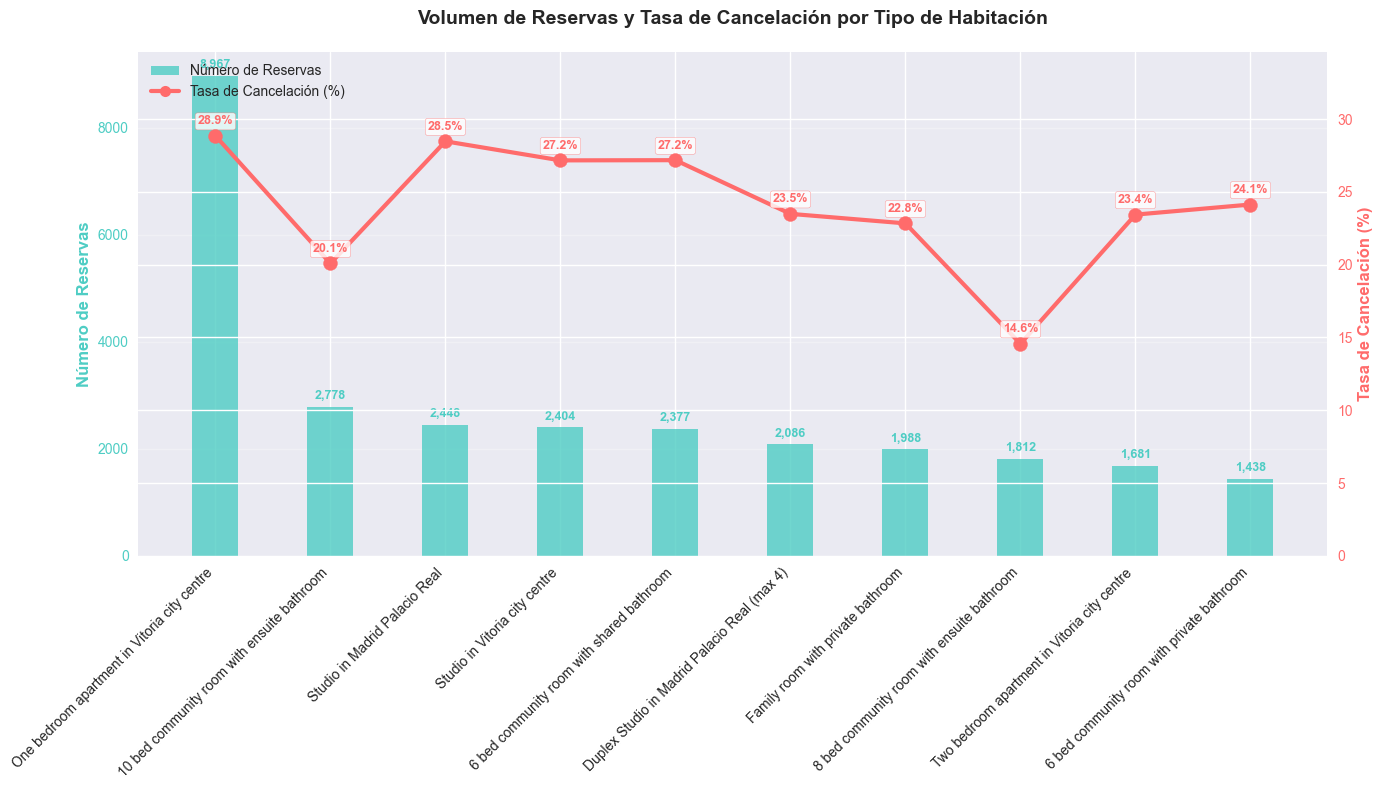

In [5]:
# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar datos
path_datos = os.path.join('Datos','Originales')
filename = os.path.join(path_datos,'cancellation_data.csv')
df = pd.read_csv(filename)
df['is_cancelled'] = df['status'] == 'cancelled'

# Convertir ADR a numérico
df['total_adr'] = pd.to_numeric(df['total_adr'], errors='coerce')

# Crear figura con un solo gráfico
fig, ax = plt.subplots(figsize=(14, 8))

if 'requested_category_name' in df.columns:
    # Obtener los 10 tipos de habitación más reservados
    room_counts = df['requested_category_name'].value_counts().head(10)
    
    # Calcular tasa de cancelación para los mismos tipos (ordenados por volumen)
    cancel_by_room = df.groupby('requested_category_name')['is_cancelled'].mean() * 100
    
    # Asegurarnos de usar los mismos tipos ordenados por volumen de reservas
    cancel_by_room = cancel_by_room.loc[room_counts.index]
    
    # Crear gráfico de barras combinadas con eje secundario
    x = np.arange(len(room_counts))
    
    # Crear eje secundario
    ax2 = ax.twinx()
    
    # Barras de volumen (eje izquierdo)
    bars1 = ax.bar(x, room_counts.values, width=0.4, color='#4ecdc4', 
                   alpha=0.8, label='Número de Reservas', align='center')
    
    # Línea de tasa de cancelación (eje derecho)
    line1 = ax2.plot(x, cancel_by_room.values, color='#ff6b6b', 
                    linewidth=3, marker='o', markersize=8, 
                    label='Tasa de Cancelación (%)')
    
    # Puntos de la línea
    scatter = ax2.scatter(x, cancel_by_room.values, color='#ff6b6b', 
                         s=100, zorder=5)
    
    # Configurar ejes X
    ax.set_xticks(x)
    ax.set_xticklabels(room_counts.index, rotation=45, ha='right', fontsize=10)
    
    # Configurar eje Y izquierdo (volumen)
    ax.set_ylabel('Número de Reservas', fontsize=12, color='#4ecdc4', fontweight='bold')
    ax.tick_params(axis='y', labelcolor='#4ecdc4')
    
    # Configurar eje Y derecho (cancelación)
    ax2.set_ylabel('Tasa de Cancelación (%)', fontsize=12, color='#ff6b6b', fontweight='bold')
    ax2.tick_params(axis='y', labelcolor='#ff6b6b')
    
    # Añadir valores en las barras
    for i, (bar, count) in enumerate(zip(bars1, room_counts.values)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + room_counts.max()*0.01,
               f'{count:,}', ha='center', va='bottom', fontsize=9, 
               color='#4ecdc4', fontweight='bold')
    
    # Añadir valores en los puntos de cancelación
    for i, rate in enumerate(cancel_by_room.values):
        ax2.text(i, rate + cancel_by_room.max()*0.02, f'{rate:.1f}%', 
                ha='center', va='bottom', fontsize=9, color='#ff6b6b', 
                fontweight='bold', bbox=dict(boxstyle='round,pad=0.2', 
                facecolor='white', alpha=0.8, edgecolor='#ff6b6b'))
    
    # Leyenda combinada
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)
    
    # Título
    ax.set_title('Volumen de Reservas y Tasa de Cancelación por Tipo de Habitación', 
                fontsize=14, fontweight='bold', pad=20)
    
    # Grid
    ax.grid(True, alpha=0.3, axis='y')
    
    # Ajustar límites del eje Y derecho para mejor visualización
    ax2.set_ylim([0, cancel_by_room.max() * 1.2])
    
else:
    # Si no existe la columna 'requested_category_name', mostrar mensaje
    ax.text(0.5, 0.5, 'ERROR: Columna "requested_category_name" no encontrada\nen los datos', 
            ha='center', va='center', fontsize=12, transform=ax.transAxes,
            fontweight='bold', bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))
    ax.set_title('GRÁFICO NO DISPONIBLE', fontsize=14, fontweight='bold', color='red')

# Ajustar layout
plt.tight_layout()
plt.show()

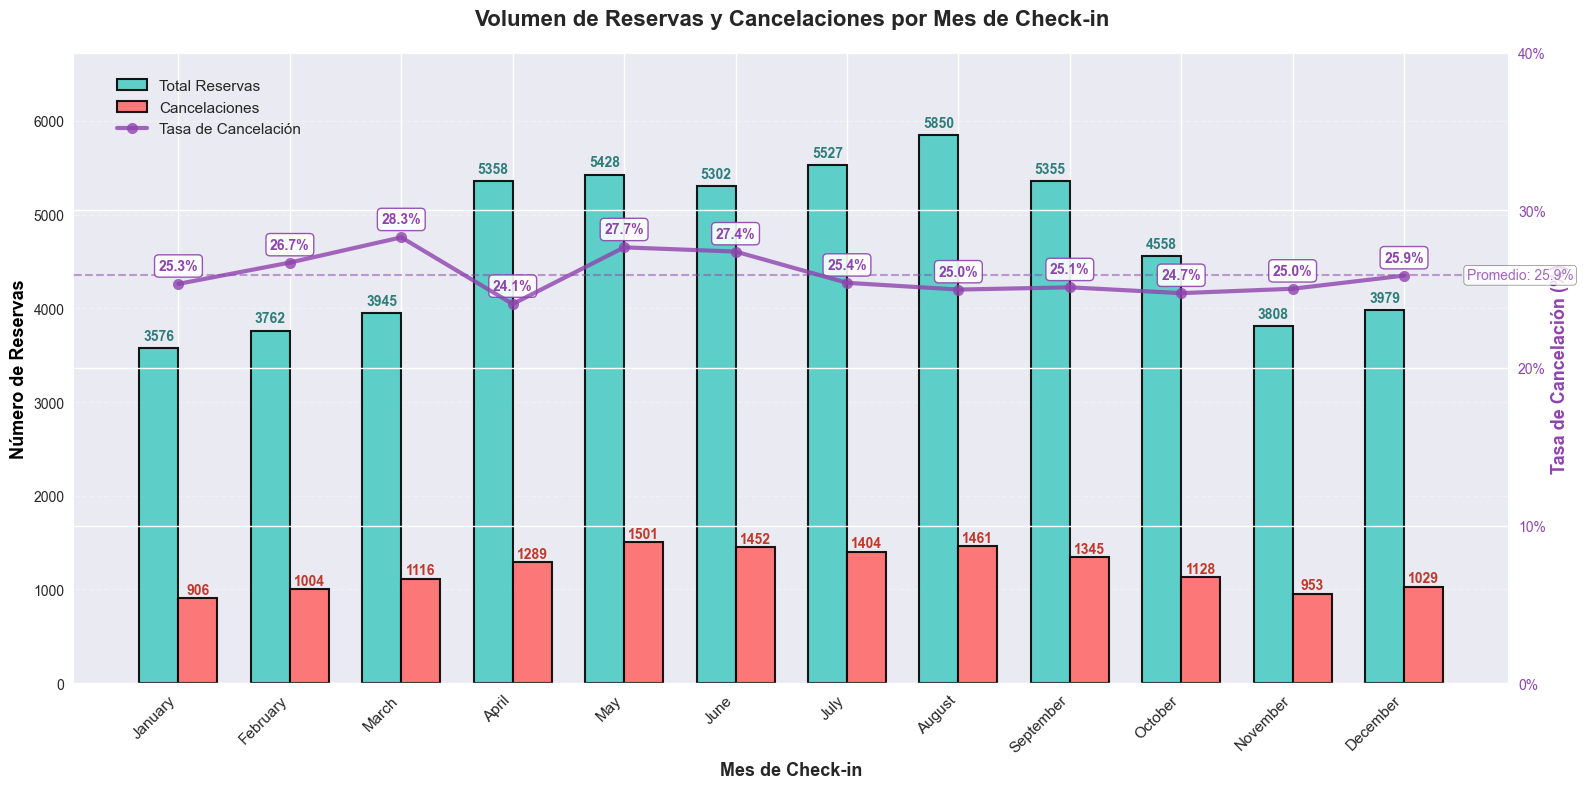


RESUMEN: VOLUMEN DE RESERVAS Y CANCELACIONES POR MES
                    Total Reservas  Cancelaciones  Completadas  Tasa Cancelación (%)  Tasa Completadas (%)
checkin_month_name                                                                                        
January                       3576            906         2670                  25.3                  74.7
February                      3762           1004         2758                  26.7                  73.3
March                         3945           1116         2829                  28.3                  71.7
April                         5358           1289         4069                  24.1                  75.9
May                           5428           1501         3927                  27.7                  72.3
June                          5302           1452         3850                  27.4                  72.6
July                          5527           1404         4123                  25.4      

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar datos
path_datos = os.path.join('Datos', 'Originales')
filename = os.path.join(path_datos, 'cancellation_data.csv')
df = pd.read_csv(filename)
df['is_cancelled'] = df['status'] == 'cancelled'

# Convertir checkin_time a datetime y extraer mes
df['checkin_time'] = pd.to_datetime(df['checkin_time'], format='%b %d, %Y, %H:%M')
df['checkin_month'] = df['checkin_time'].dt.month
df['checkin_month_name'] = df['checkin_time'].dt.month_name()

# Calcular estadísticas por mes
cancel_by_month = df.groupby('checkin_month_name')['is_cancelled'].agg(['sum', 'count'])
cancel_by_month['cancellation_rate'] = (cancel_by_month['sum'] / cancel_by_month['count']) * 100

# Ordenar por mes cronológicamente
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
cancel_by_month = cancel_by_month.reindex(month_order)

# Filtrar solo meses con datos
cancel_by_month = cancel_by_month.dropna()

# Crear figura
fig, ax1 = plt.subplots(figsize=(16, 8))

# Posiciones para las barras
x_pos = range(len(cancel_by_month))
width = 0.35

# Crear barras agrupadas en el eje primario (ax1)
bars_total = ax1.bar([p - width/2 for p in x_pos], cancel_by_month['count'], 
                     width, label='Total Reservas', color='#4ecdc4', alpha=0.9, 
                     edgecolor='black', linewidth=1.5)

bars_cancelled = ax1.bar([p + width/2 for p in x_pos], cancel_by_month['sum'], 
                         width, label='Cancelaciones', color='#ff6b6b', alpha=0.9, 
                         edgecolor='black', linewidth=1.5)

# Configurar el gráfico - EJE PRIMARIO (ax1)
ax1.set_xlabel('Mes de Check-in', fontsize=13, fontweight='bold')
ax1.set_ylabel('Número de Reservas', fontsize=13, fontweight='bold', color='black')
ax1.set_title('Volumen de Reservas y Cancelaciones por Mes de Check-in', 
              fontsize=16, fontweight='bold', pad=20)

# Configurar eje X
ax1.set_xticks(x_pos)
ax1.set_xticklabels(cancel_by_month.index, rotation=45, ha='right', fontsize=11)

# Añadir valores en las barras
for i, (bar_total, bar_cancelled) in enumerate(zip(bars_total, bars_cancelled)):
    # Valor en barras de total
    height_total = bar_total.get_height()
    ax1.text(bar_total.get_x() + bar_total.get_width()/2., height_total + max(cancel_by_month['count'])*0.01,
             f'{int(height_total)}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='#2d7d7a')
    
    # Valor en barras de cancelaciones
    height_cancelled = bar_cancelled.get_height()
    ax1.text(bar_cancelled.get_x() + bar_cancelled.get_width()/2., height_cancelled + max(cancel_by_month['sum'])*0.01,
             f'{int(height_cancelled)}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='#c0392b')

# ==============================================
# AÑADIR LÍNEA MORADA CON TASA DE CANCELACIÓN - EJE SECUNDARIO
# ==============================================
# Crear eje secundario para la tasa de cancelación
ax2 = ax1.twinx()

# Añadir línea morada para tasa de cancelación
line_rate, = ax2.plot(x_pos, cancel_by_month['cancellation_rate'], 
                      marker='o', linewidth=3, markersize=8, color='#8e44ad', 
                      label='Tasa de Cancelación', alpha=0.8, zorder=5)

# Configurar eje secundario - FIJAR LÍMITE EN 40%
max_tasa = max(cancel_by_month['cancellation_rate'])
# Establecer límite fijo en 40% para mejor visualización
ax2.set_ylim(0, 40)
ax2.set_ylabel('Tasa de Cancelación (%)', fontsize=13, fontweight='bold', color='#8e44ad')

# Configurar los ticks del eje derecho como porcentajes
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
ax2.tick_params(axis='y', labelcolor='#8e44ad')

# Ajustar los ticks del eje derecho (0, 10, 20, 30, 40)
ax2.yaxis.set_major_locator(plt.MultipleLocator(10))  # Ticks cada 10%

# Añadir etiquetas de valores para la línea morada
for i, (mes, tasa) in enumerate(zip(cancel_by_month.index, cancel_by_month['cancellation_rate'])):
    ax2.annotate(f'{tasa:.1f}%', 
                 xy=(i, tasa), 
                 xytext=(0, 10), 
                 textcoords='offset points',
                 ha='center', 
                 fontsize=10,
                 fontweight='bold',
                 color='#8e44ad',
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9, 
                          edgecolor='#8e44ad', linewidth=1))

# ==============================================
# COMBINAR LEYENDAS Y FINALIZAR GRÁFICO
# ==============================================
# Combinar leyendas de ambos ejes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11, 
           framealpha=0.9, bbox_to_anchor=(0.02, 0.98))

# Añadir grid solo en el eje Y primario
ax1.grid(True, alpha=0.3, linestyle='--', axis='y')

# Ajustar límites del eje Y principal
ax1.set_ylim([0, max(cancel_by_month['count']) * 1.15])

# Añadir línea horizontal para la tasa promedio
tasa_promedio = cancel_by_month['cancellation_rate'].mean()
ax2.axhline(y=tasa_promedio, color='#8e44ad', linestyle='--', alpha=0.5, linewidth=1.5)

# Asegurar que la anotación del promedio se muestre dentro del gráfico
if tasa_promedio <= 40:
    ax2.annotate(f'Promedio: {tasa_promedio:.1f}%', 
                 xy=(len(cancel_by_month)-0.5, min(tasa_promedio, 39.5)),  # Limitar a 39.5% si está cerca del borde
                 xytext=(5, 0), 
                 textcoords='offset points',
                 ha='left', 
                 va='center',
                 fontsize=10,
                 color='#8e44ad',
                 alpha=0.8,
                 bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))
else:
    # Si el promedio es mayor a 40%, mostrarlo en el límite superior
    ax2.annotate(f'Promedio: {tasa_promedio:.1f}%', 
                 xy=(len(cancel_by_month)-0.5, 39.5),
                 xytext=(5, 0), 
                 textcoords='offset points',
                 ha='left', 
                 va='center',
                 fontsize=10,
                 color='#8e44ad',
                 alpha=0.8,
                 bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

# Ajustar layout
plt.tight_layout()
plt.show()

# ==============================================
# TABLA RESUMEN
# ==============================================
print("\n" + "="*80)
print("RESUMEN: VOLUMEN DE RESERVAS Y CANCELACIONES POR MES")
print("="*80)

# Crear tabla con información completa
summary_table = pd.DataFrame({
    'Total Reservas': cancel_by_month['count'].astype(int),
    'Cancelaciones': cancel_by_month['sum'].astype(int),
    'Completadas': (cancel_by_month['count'] - cancel_by_month['sum']).astype(int),
    'Tasa Cancelación (%)': cancel_by_month['cancellation_rate'].round(1),
    'Tasa Completadas (%)': (100 - cancel_by_month['cancellation_rate']).round(1)
})

print(summary_table.to_string())

print("\n" + "-"*80)
print("ANÁLISIS DESTACADO:")
print("-"*80)

# Calcular métricas clave
total_reservas = cancel_by_month['count'].sum()
total_cancelaciones = cancel_by_month['sum'].sum()
tasa_general = (total_cancelaciones / total_reservas) * 100

# Encontrar extremos
mes_max_reservas = cancel_by_month['count'].idxmax()
mes_min_reservas = cancel_by_month['count'].idxmin()
mes_max_cancel = cancel_by_month['sum'].idxmax()
mes_min_cancel = cancel_by_month['sum'].idxmin()
mes_max_tasa = cancel_by_month['cancellation_rate'].idxmax()
mes_min_tasa = cancel_by_month['cancellation_rate'].idxmin()

print(f"📈 MES CON MÁS ACTIVIDAD:")
print(f"   • Reservas: {mes_max_reservas} ({cancel_by_month['count'].max():.0f} reservas)")
print(f"   • Cancelaciones: {mes_max_cancel} ({cancel_by_month['sum'].max():.0f} cancelaciones)")
print(f"   • Tasa más alta: {mes_max_tasa} ({cancel_by_month['cancellation_rate'].max():.1f}%)\n")

print(f"📉 MES CON MENOS ACTIVIDAD:")
print(f"   • Reservas: {mes_min_reservas} ({cancel_by_month['count'].min():.0f} reservas)")
print(f"   • Cancelaciones: {mes_min_cancel} ({cancel_by_month['sum'].min():.0f} cancelaciones)")
print(f"   • Tasa más baja: {mes_min_tasa} ({cancel_by_month['cancellation_rate'].min():.1f}%)\n")

print("📊 ESTADÍSTICAS GENERALES:")
print(f"   • Total reservas: {total_reservas:,}")
print(f"   • Total cancelaciones: {total_cancelaciones:,}")
print(f"   • Tasa general de cancelación: {tasa_general:.1f}%")
print(f"   • Tasa promedio mensual: {cancel_by_month['cancellation_rate'].mean():.1f}%")
print(f"   • Rango de tasas: {cancel_by_month['cancellation_rate'].min():.1f}% - {cancel_by_month['cancellation_rate'].max():.1f}%")
print(f"   • Meses analizados: {len(cancel_by_month)}")

# Calcular ratio cancelaciones/reservas por mes
print("\n📋 RATIO CANCELACIONES/RESERVAS POR MES:")
print("-"*80)
for mes in cancel_by_month.index:
    total = int(cancel_by_month.loc[mes, 'count'])
    cancel = int(cancel_by_month.loc[mes, 'sum'])
    ratio = cancel / total if total > 0 else 0
    if cancel > 0:
        ratio_inv = 1/ratio if ratio > 0 else float('inf')
        print(f"   {mes}: {cancel}/{total} = {ratio:.2f} (1 cancelación cada {ratio_inv:.1f} reservas)")
    else:
        print(f"   {mes}: {cancel}/{total} = {ratio:.2f} (sin cancelaciones)")

C:\Users\Umiak\AppData\Local\Temp\ipykernel_20792\1139427489.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


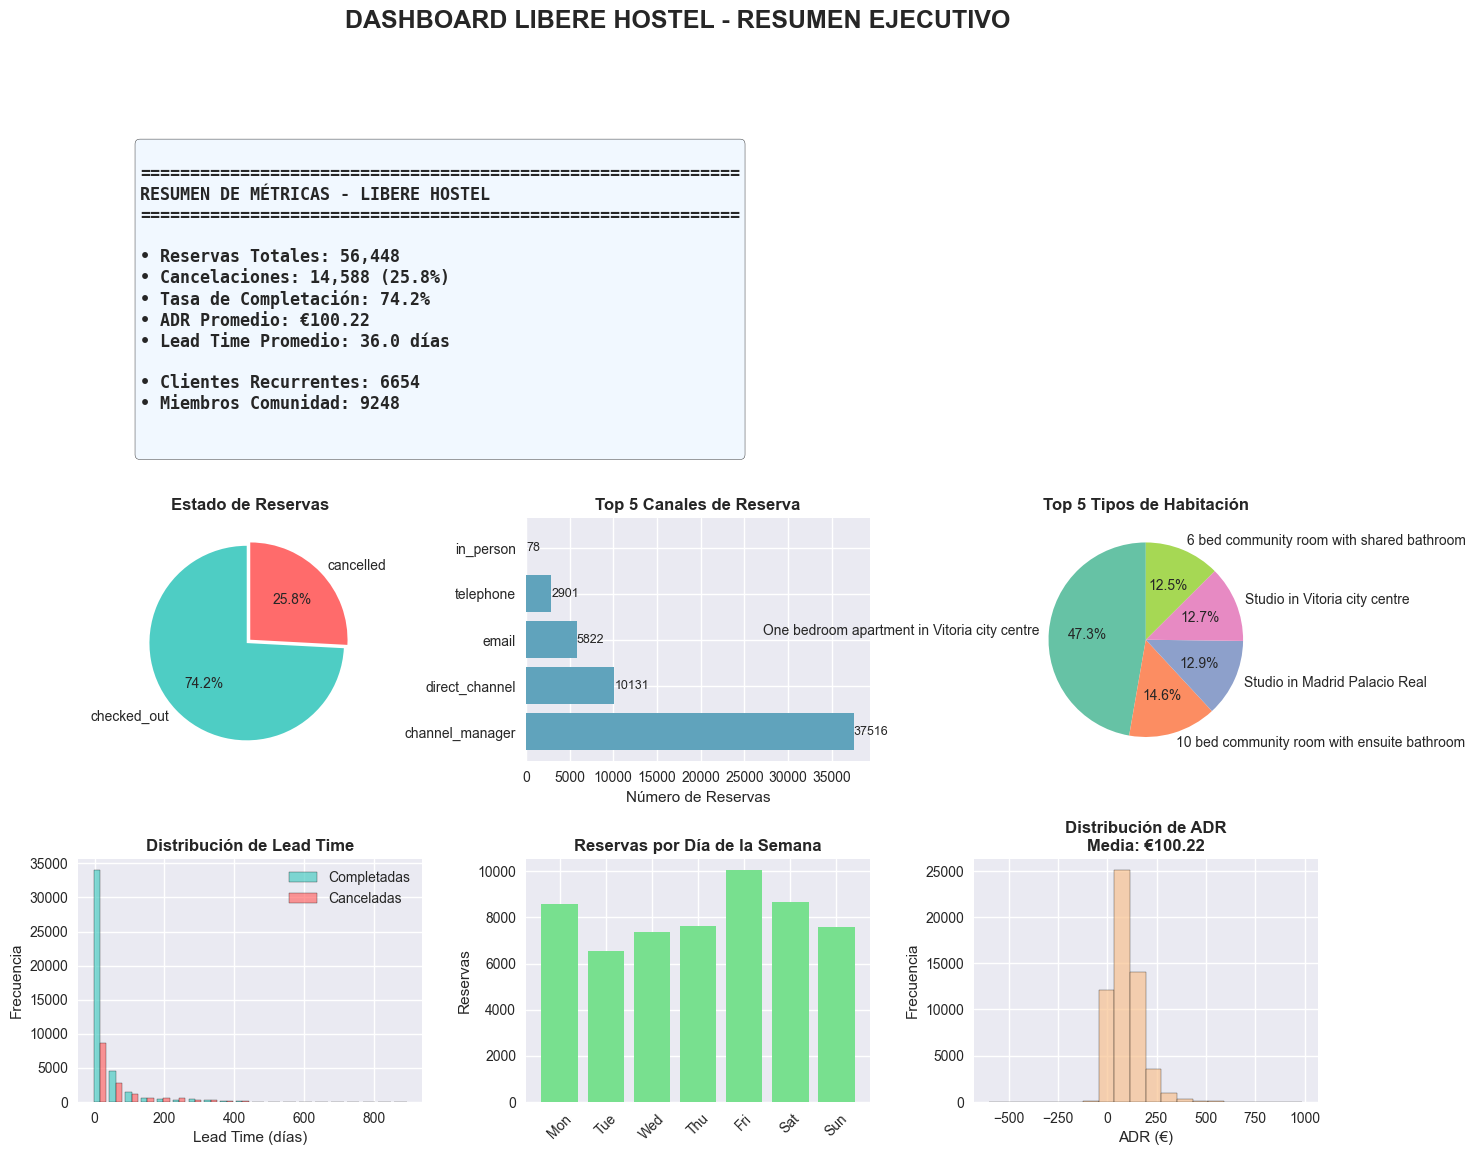

INFORMACIÓN ADICIONAL DEL DATASET
Columnas disponibles: ['booked_at', 'checkin_time', 'checkout_time', 'lead_time', 'lenght_of_stay', 'checkin_month', 'checkin_day', 'adult_count', 'child_count', 'origin', 'travel_agency_name', 'requested_category', 'requested_category_name', 'asset', 'asset_type', 'brand', 'asset_opening_date', 'available_units', 'business_segment', 'rate', 'rate_group_name', 'rate_type', 'completed_entry_forms_count', 'all_entry_forms_completed', 'last_entry_form_completed_at', 'returning_inhabitant', 'recurrence', 'libere_community', 'bought_products', 'product_count', 'reservation_net_value', 'total_adr', 'status', 'cancelled_at', 'cancellation_reason', 'cancellation_lead_time', 'is_cancelled', 'lead_time_numeric']
Tipos de datos:
booked_at                        object
checkin_time                     object
checkout_time                    object
lead_time                         int64
lenght_of_stay                    int64
checkin_month                    objec

In [7]:
# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar datos
path_datos = os.path.join('Datos','Originales')
filename = os.path.join(path_datos,'cancellation_data.csv')
df = pd.read_csv(filename)
df['is_cancelled'] = df['status'] == 'cancelled'

# Convertir columnas numéricas si existen
if 'total_adr' in df.columns:
    df['total_adr'] = pd.to_numeric(df['total_adr'], errors='coerce')

if 'lead_time' in df.columns:
    df['lead_time'] = pd.to_numeric(df['lead_time'], errors='coerce')

# GRÁFICO 6: Dashboard Resumen
fig = plt.figure(figsize=(16, 12))
fig.suptitle('DASHBOARD LIBERE HOSTEL - RESUMEN EJECUTIVO', 
             fontsize=18, fontweight='bold', y=1.02)

# Layout usando GridSpec
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3)

# ========== PANEL SUPERIOR: MÉTRICAS CLAVE ==========
ax1 = fig.add_subplot(gs[0, :])
ax1.axis('off')

# Calcular métricas
total_reservas = len(df)
cancelaciones = df['is_cancelled'].sum()
tasa_cancelacion = (cancelaciones / total_reservas) * 100
tasa_completacion = 100 - tasa_cancelacion

# ADR promedio - manejar posibles valores no numéricos
if 'total_adr' in df.columns:
    # Filtrar solo valores numéricos válidos
    adr_valores = pd.to_numeric(df['total_adr'], errors='coerce')
    adr_promedio = adr_valores.mean()
    if pd.isna(adr_promedio):
        adr_promedio = 0
        adr_texto = "€0.00 (datos no disponibles)"
    else:
        adr_texto = f"€{adr_promedio:.2f}"
else:
    adr_promedio = 0
    adr_texto = "€0.00 (columna no encontrada)"

# Lead time promedio - manejar posibles valores no numéricos
if 'lead_time' in df.columns:
    lead_valores = pd.to_numeric(df['lead_time'], errors='coerce')
    lead_promedio = lead_valores.mean()
    if pd.isna(lead_promedio):
        lead_promedio = 0
        lead_texto = "0.0 días (datos no disponibles)"
    else:
        lead_texto = f"{lead_promedio:.1f} días"
else:
    lead_promedio = 0
    lead_texto = "0.0 días (columna no encontrada)"

# Crear texto con métricas
metricas_texto = f'''
{'='*60}
RESUMEN DE MÉTRICAS - LIBERE HOSTEL
{'='*60}

• Reservas Totales: {total_reservas:,}
• Cancelaciones: {cancelaciones:,} ({tasa_cancelacion:.1f}%)
• Tasa de Completación: {tasa_completacion:.1f}%
• ADR Promedio: {adr_texto}
• Lead Time Promedio: {lead_texto}

• Clientes Recurrentes: {df['returning_inhabitant'].eq('yes').sum() if 'returning_inhabitant' in df.columns else 'N/A'}
• Miembros Comunidad: {df['libere_community'].eq('yes').sum() if 'libere_community' in df.columns else 'N/A'}

'''

ax1.text(0.05, 0.5, metricas_texto, fontsize=12, fontfamily='monospace',
         verticalalignment='center', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='#f0f8ff', alpha=0.9))

# ========== PANEL IZQUIERDO: DISTRIBUCIONES ==========
ax2 = fig.add_subplot(gs[1, 0])
# Distribución de estados
status_counts = df['status'].value_counts()
colors = ['#4ecdc4', '#ff6b6b']
ax2.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90, explode=[0.05, 0])
ax2.set_title('Estado de Reservas', fontsize=12, fontweight='bold')

# ========== PANEL CENTRAL: CANALES ==========
ax3 = fig.add_subplot(gs[1, 1])
if 'origin' in df.columns:
    top_channels = df['origin'].value_counts().head(5)
    ax3.barh(range(len(top_channels)), top_channels.values, color='#60a3bc')
    ax3.set_yticks(range(len(top_channels)))
    ax3.set_yticklabels(top_channels.index)
    ax3.set_xlabel('Número de Reservas')
    ax3.set_title('Top 5 Canales de Reserva', fontsize=12, fontweight='bold')
    
    for i, v in enumerate(top_channels.values):
        ax3.text(v + 0.5, i, str(v), va='center', fontsize=9)
else:
    ax3.text(0.5, 0.5, 'Datos de origen\nno disponibles', 
             ha='center', va='center', transform=ax3.transAxes,
             fontsize=10, fontweight='bold')
    ax3.set_title('Canales de Reserva', fontsize=12, fontweight='bold')
    ax3.axis('off')

# ========== PANEL DERECHO: HABITACIONES ==========
ax4 = fig.add_subplot(gs[1, 2])
if 'requested_category_name' in df.columns:
    top_rooms = df['requested_category_name'].value_counts().head(5)
    colors_rooms = sns.color_palette("Set2", len(top_rooms))
    ax4.pie(top_rooms.values, labels=top_rooms.index, autopct='%1.1f%%',
            colors=colors_rooms, startangle=90)
    ax4.set_title('Top 5 Tipos de Habitación', fontsize=12, fontweight='bold')
else:
    ax4.text(0.5, 0.5, 'Datos de habitaciones\nno disponibles', 
             ha='center', va='center', transform=ax4.transAxes,
             fontsize=10, fontweight='bold')
    ax4.set_title('Tipos de Habitación', fontsize=12, fontweight='bold')
    ax4.axis('off')

# ========== PANEL INFERIOR IZQUIERDO: LEAD TIME ==========
ax5 = fig.add_subplot(gs[2, 0])
if 'lead_time' in df.columns:
    # Convertir a numérico y manejar valores faltantes
    df['lead_time_numeric'] = pd.to_numeric(df['lead_time'], errors='coerce')
    
    lead_cancel = df[df['is_cancelled']]['lead_time_numeric'].dropna()
    lead_complete = df[~df['is_cancelled']]['lead_time_numeric'].dropna()
    
    if len(lead_cancel) > 0 and len(lead_complete) > 0:
        ax5.hist([lead_complete, lead_cancel], bins=20, 
                 label=['Completadas', 'Canceladas'],
                 color=['#4ecdc4', '#ff6b6b'], alpha=0.7, edgecolor='black')
        ax5.set_xlabel('Lead Time (días)')
        ax5.set_ylabel('Frecuencia')
        ax5.set_title('Distribución de Lead Time', fontsize=12, fontweight='bold')
        ax5.legend()
    else:
        ax5.text(0.5, 0.5, 'Datos insuficientes\npara Lead Time', 
                 ha='center', va='center', transform=ax5.transAxes,
                 fontsize=10, fontweight='bold')
        ax5.set_title('Lead Time', fontsize=12, fontweight='bold')
        ax5.axis('off')
else:
    ax5.text(0.5, 0.5, 'Lead Time\nno disponible', 
             ha='center', va='center', transform=ax5.transAxes,
             fontsize=10, fontweight='bold')
    ax5.set_title('Lead Time', fontsize=12, fontweight='bold')
    ax5.axis('off')

# ========== PANEL INFERIOR CENTRAL: TEMPORAL ==========
ax6 = fig.add_subplot(gs[2, 1])
if 'checkin_day' in df.columns:
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts = df['checkin_day'].value_counts().reindex(day_order, fill_value=0)
    
    ax6.bar(range(len(day_counts)), day_counts.values, color='#78e08f')
    ax6.set_xticks(range(len(day_counts)))
    ax6.set_xticklabels([d[:3] for d in day_counts.index], rotation=45)
    ax6.set_ylabel('Reservas')
    ax6.set_title('Reservas por Día de la Semana', fontsize=12, fontweight='bold')
else:
    ax6.text(0.5, 0.5, 'Datos temporales\nno disponibles', 
             ha='center', va='center', transform=ax6.transAxes,
             fontsize=10, fontweight='bold')
    ax6.set_title('Distribución Temporal', fontsize=12, fontweight='bold')
    ax6.axis('off')

# ========== PANEL INFERIOR DERECHO: ADR ==========
ax7 = fig.add_subplot(gs[2, 2])
if 'total_adr' in df.columns:
    # Convertir a numérico
    adr_data = pd.to_numeric(df['total_adr'], errors='coerce').dropna()
    
    if len(adr_data) > 0:
        ax7.hist(adr_data, bins=20, color='#f8c291', edgecolor='black', alpha=0.7)
        ax7.set_xlabel('ADR (€)')
        ax7.set_ylabel('Frecuencia')
        media_adr = adr_data.mean()
        ax7.set_title(f'Distribución de ADR\nMedia: €{media_adr:.2f}', 
                     fontsize=12, fontweight='bold')
    else:
        ax7.text(0.5, 0.5, 'Datos de ADR\nno disponibles', 
                 ha='center', va='center', transform=ax7.transAxes,
                 fontsize=10, fontweight='bold')
        ax7.set_title('Distribución de ADR', fontsize=12, fontweight='bold')
        ax7.axis('off')
else:
    ax7.text(0.5, 0.5, 'ADR\nno disponible', 
             ha='center', va='center', transform=ax7.transAxes,
             fontsize=10, fontweight='bold')
    ax7.set_title('Distribución de ADR', fontsize=12, fontweight='bold')
    ax7.axis('off')

plt.tight_layout()
plt.show()

# Mostrar información adicional en consola
print("="*60)
print("INFORMACIÓN ADICIONAL DEL DATASET")
print("="*60)
print(f"Columnas disponibles: {df.columns.tolist()}")
print(f"Tipos de datos:")
print(df.dtypes)
print("\nValores únicos en columnas clave:")

columnas_clave = ['status', 'origin', 'business_segment', 'rate_type', 'requested_category_name']
for col in columnas_clave:
    if col in df.columns:
        print(f"- {col}: {df[col].nunique()} valores únicos")

if 'total_adr' in df.columns:
    print(f"\nEstadísticas de ADR:")
    print(f"  Valores no numéricos: {df['total_adr'].apply(lambda x: not str(x).replace('.', '', 1).isdigit() if pd.notna(x) else False).sum()}")
    print(f"  Valores nulos: {df['total_adr'].isna().sum()}")

## Graficos Generales

C:\Users\Umiak\AppData\Local\Temp\ipykernel_20792\4271756240.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stay_cancel_rate = df.groupby(stay_bins)['is_cancelled'].mean() * 100


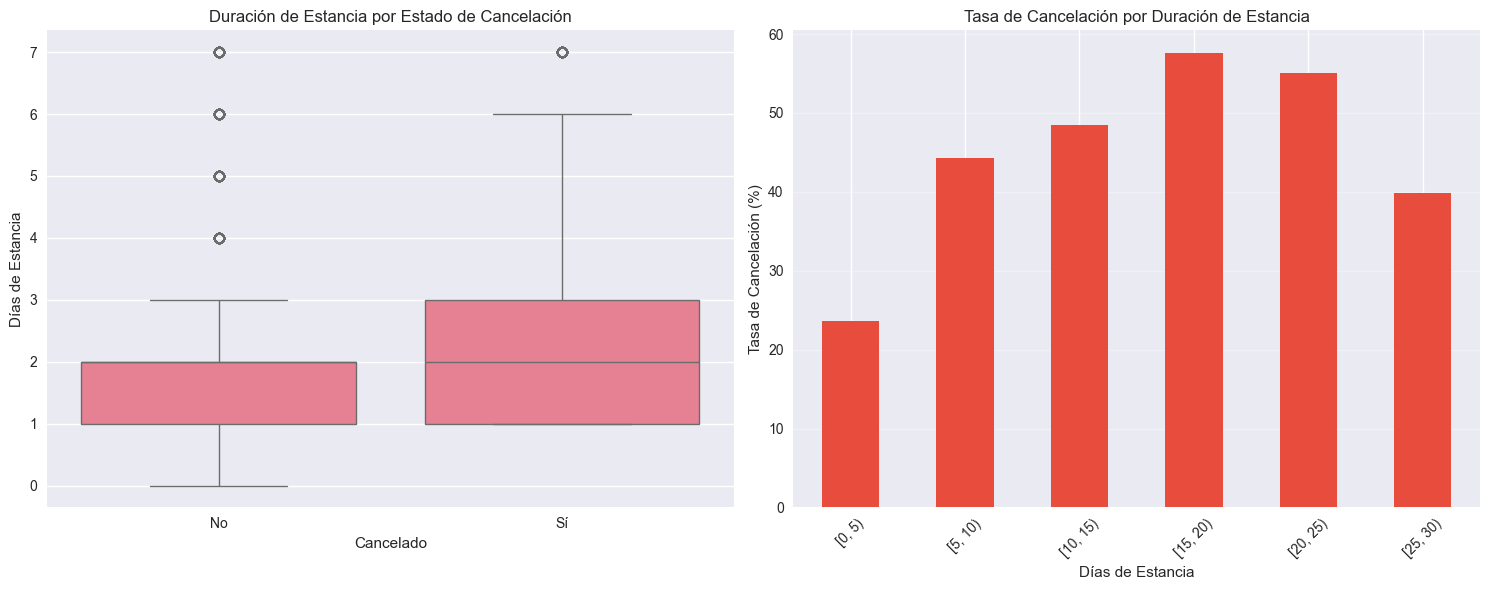

In [12]:
# Gráfico 5: Duración de estancia vs cancelación
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
# Boxplot (limitando outliers)
df_stay = df[df['lenght_of_stay'] <= df['lenght_of_stay'].quantile(0.95)]
sns.boxplot(x='is_cancelled', y='lenght_of_stay', data=df_stay)
plt.title('Duración de Estancia por Estado de Cancelación')
plt.xlabel('Cancelado')
plt.ylabel('Días de Estancia')
plt.xticks([0, 1], ['No', 'Sí'])

plt.subplot(1, 2, 2)
# Tasa de cancelación por duración
stay_bins = pd.cut(df['lenght_of_stay'], bins=range(0, 31, 5), right=False)
stay_cancel_rate = df.groupby(stay_bins)['is_cancelled'].mean() * 100

stay_cancel_rate.plot(kind='bar', color='#e74c3c')
plt.title('Tasa de Cancelación por Duración de Estancia')
plt.xlabel('Días de Estancia')
plt.ylabel('Tasa de Cancelación (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

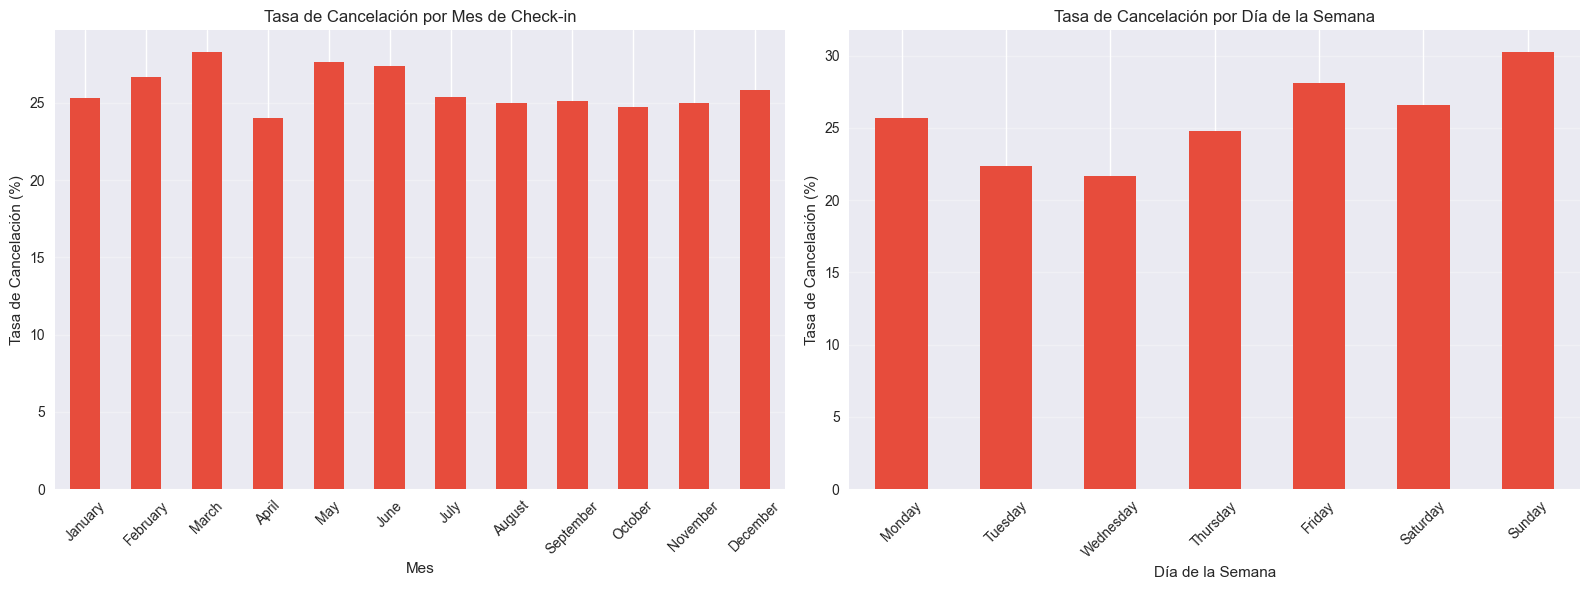

In [14]:
# Gráfico 7: Cancelación por mes y día
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Por mes
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']
month_cancel = pd.crosstab(df['checkin_month'], df['is_cancelled'], normalize='index') * 100
month_cancel = month_cancel.reindex([m for m in month_order if m in month_cancel.index])

month_cancel[True].plot(kind='bar', ax=ax1, color='#e74c3c')
ax1.set_title('Tasa de Cancelación por Mes de Check-in')
ax1.set_ylabel('Tasa de Cancelación (%)')
ax1.set_xlabel('Mes')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Por día de la semana
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_cancel = pd.crosstab(df['checkin_day'], df['is_cancelled'], normalize='index') * 100
day_cancel = day_cancel.reindex([d for d in day_order if d in day_cancel.index])

day_cancel[True].plot(kind='bar', ax=ax2, color='#e74c3c')
ax2.set_title('Tasa de Cancelación por Día de la Semana')
ax2.set_ylabel('Tasa de Cancelación (%)')
ax2.set_xlabel('Día de la Semana')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

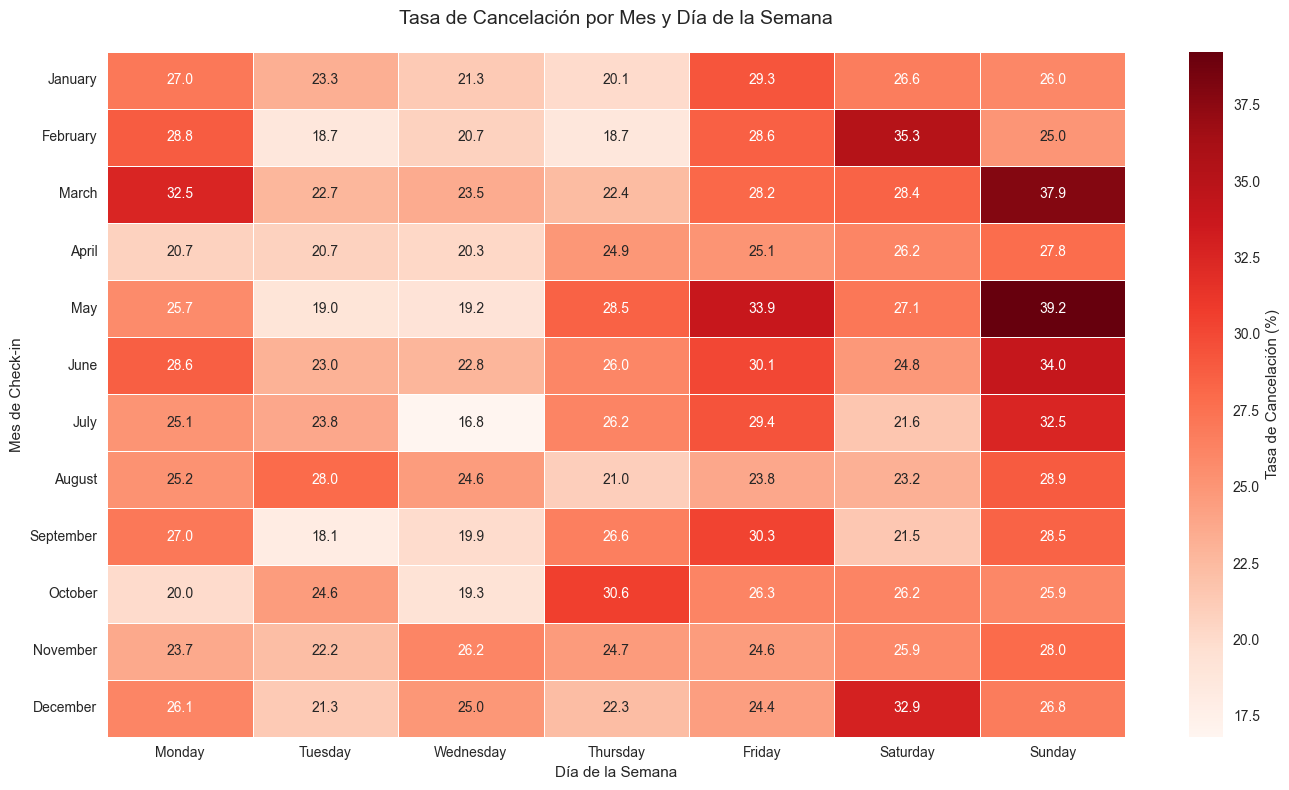

In [17]:
# 10. Heatmap Cancelación por mes y día
plt.figure(figsize=(14, 8))

# Preparar datos para heatmap
heatmap_data = df.groupby(['checkin_month', 'checkin_day'])['is_cancelled'].mean().unstack() * 100

# Ordenar meses y días
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindexar con los meses/días disponibles
available_months = [m for m in month_order if m in heatmap_data.index]
available_days = [d for d in day_order if d in heatmap_data.columns]

heatmap_data = heatmap_data.reindex(index=available_months, columns=available_days)

sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='Reds', 
            cbar_kws={'label': 'Tasa de Cancelación (%)'},
            linewidths=0.5)
plt.title('Tasa de Cancelación por Mes y Día de la Semana', fontsize=14, pad=20)
plt.xlabel('Día de la Semana')
plt.ylabel('Mes de Check-in')
plt.tight_layout()
plt.show()

## Graficos General

#### Dias de Anticipacion

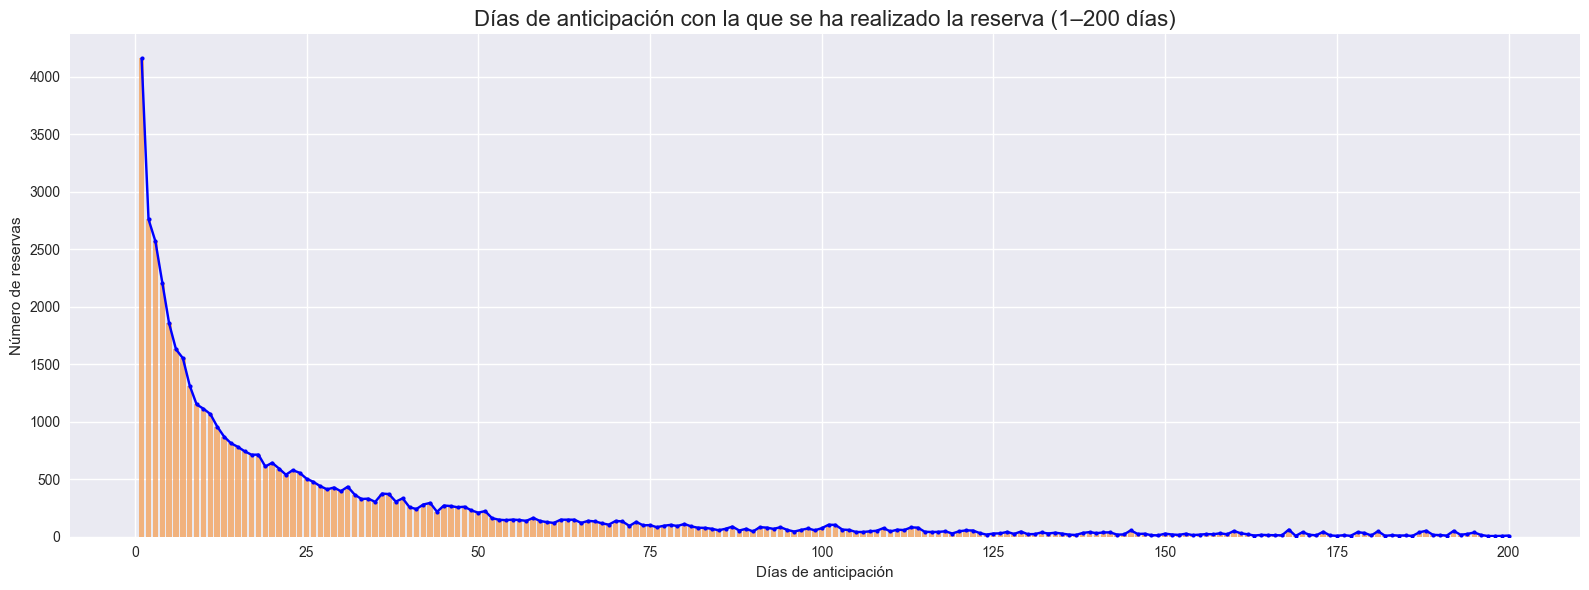

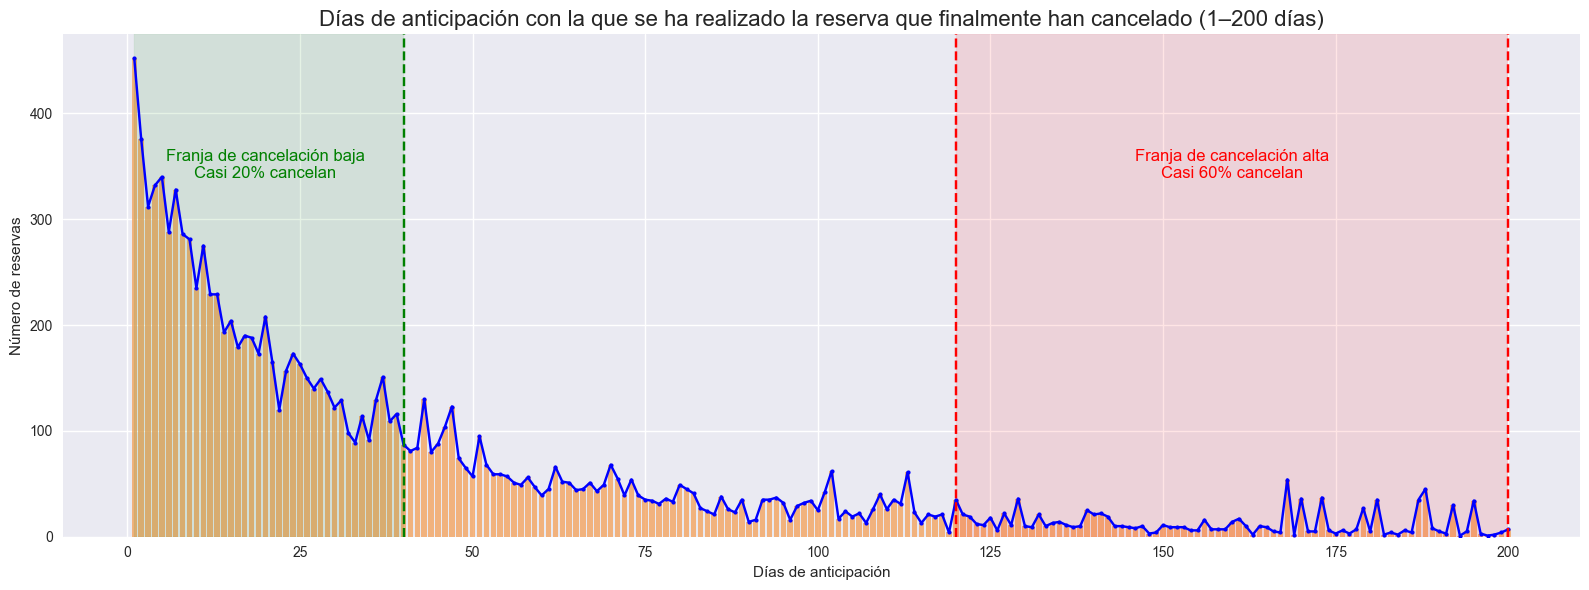

In [19]:
# --- FILTRO: solo de 1 a 200 días ---
df = df[(df["lead_time"] > 0) & (df["lead_time"] <= 200)]

# Asegurar orden ascendente
df = df.sort_values("lead_time")

# Contar reservas por día
reservas = df.groupby("lead_time").size()

# Contar cancelaciones por día
cancelaciones = df[df["is_cancelled"] == 1].groupby("lead_time").size()

# Rellenar días sin valores
cancelaciones = cancelaciones.reindex(reservas.index, fill_value=0)

# ---------------------------------------------------------
# FIGURA 1 — Todas las reservas por días de anticipación
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(16,6))

ax.bar(reservas.index, reservas.values, color="sandybrown", alpha=0.8)
ax.plot(reservas.index, reservas.values, color="blue", marker="o", markersize=3)

ax.set_title("Días de anticipación con la que se ha realizado la reserva (1–200 días)", fontsize=16)
ax.set_xlabel("Días de anticipación")
ax.set_ylabel("Número de reservas")

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# FIGURA 2 — Cancelaciones por días de anticipación
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(16,6))

ax.bar(cancelaciones.index, cancelaciones.values, color="sandybrown", alpha=0.8)
ax.plot(cancelaciones.index, cancelaciones.values, color="blue", marker="o", markersize=3)

ax.set_title("Días de anticipación con la que se ha realizado la reserva que finalmente han cancelado (1–200 días)", fontsize=16)
ax.set_xlabel("Días de anticipación")
ax.set_ylabel("Número de reservas")

# --- Franjas de cancelación ---
# Franja alta: 200–120 días
ax.axvspan(200, 120, color="red", alpha=0.1)
ax.axvline(200, color="red", linestyle="--")
ax.axvline(120, color="red", linestyle="--")
ax.text(160, max(cancelaciones)*0.75,
        "Franja de cancelación alta\nCasi 60% cancelan",
        color="red", fontsize=12, ha="center")

# Franja baja: 40–1 días
ax.axvspan(40, 1, color="green", alpha=0.1)
ax.axvline(40, color="green", linestyle="--")
ax.text(20, max(cancelaciones)*0.75,
        "Franja de cancelación baja\nCasi 20% cancelan",
        color="green", fontsize=12, ha="center")

plt.tight_layout()
plt.show()

##### Razon de reserva VS Tipo de Habitacion


Tabla de contingencia - Tipos de habitación por segmento de negocio:
requested_category   Hostel bed  Hostel room  One bedroom apartment  \
business_segment                                                      
Business Group                0            7                      6   
Business Individual          15          139                    171   
Leisure Group                 3           69                     31   
Leisure Individual         1395         2425                   2200   
MICE Group                    0           66                     82   
MICE Individual              12            1                      7   
Mid Stay                      0            2                     19   
Travel Group                  0          113                     39   
Travel Individual            16          148                    258   

requested_category   One bedroom apartment superior  Studio  Studio superior  \
business_segment                                                    

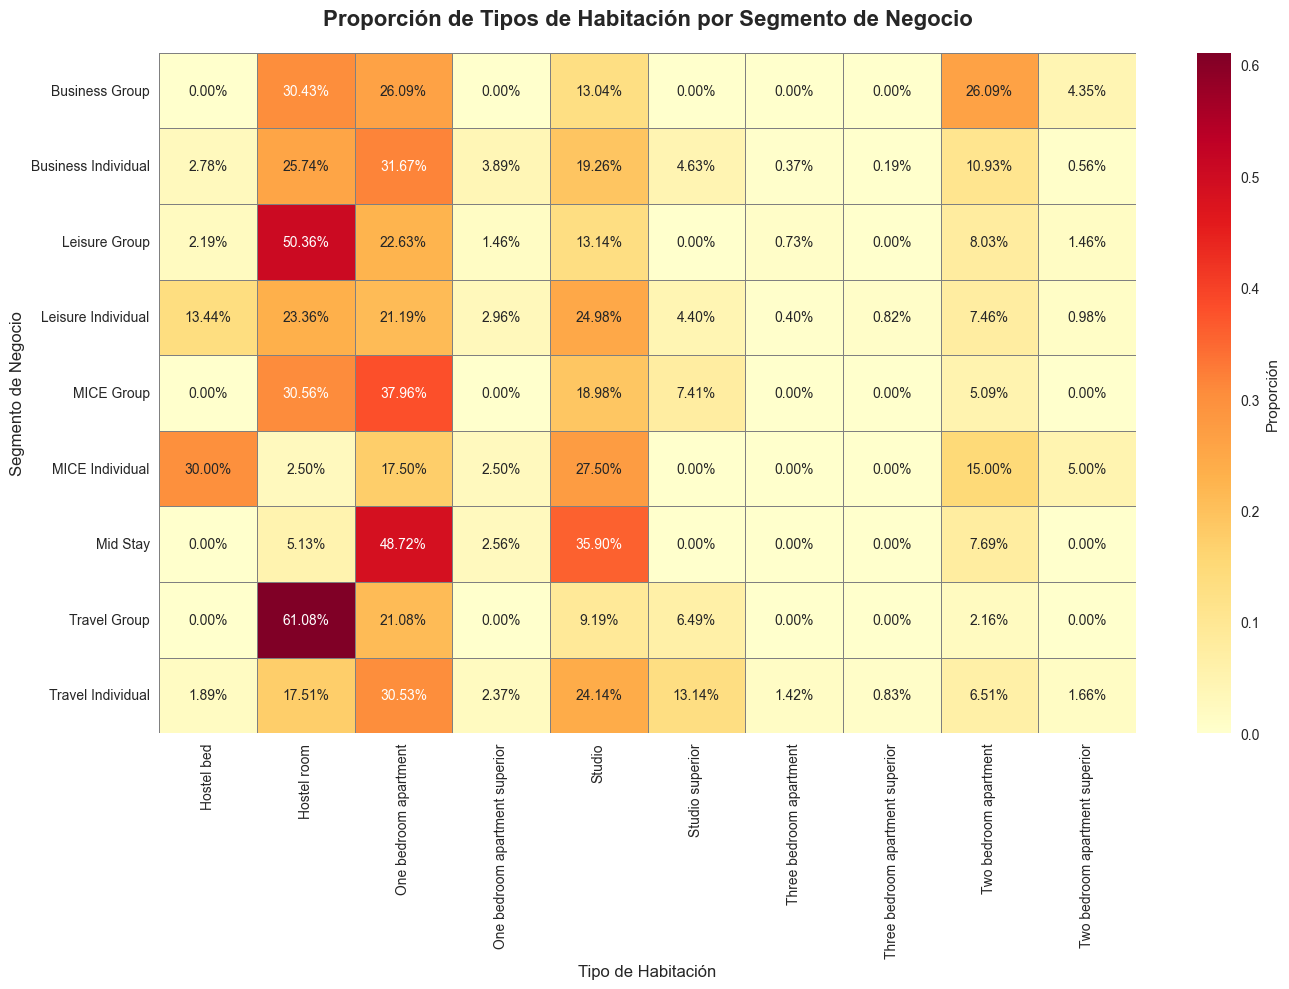


DISTRIBUCIÓN DE SEGMENTOS DE NEGOCIO:
Leisure Individual: 10,380 cancelaciones (83.7%)
Travel Individual: 845 cancelaciones (6.8%)
Business Individual: 540 cancelaciones (4.4%)
MICE Group: 216 cancelaciones (1.7%)
Travel Group: 185 cancelaciones (1.5%)
Leisure Group: 137 cancelaciones (1.1%)
MICE Individual: 40 cancelaciones (0.3%)
Mid Stay: 39 cancelaciones (0.3%)
Business Group: 23 cancelaciones (0.2%)

DISTRIBUCIÓN DE TIPOS DE HABITACIÓN:
Studio: 3,005 cancelaciones (24.2%)
Hostel room: 2,970 cancelaciones (23.9%)
One bedroom apartment: 2,813 cancelaciones (22.7%)
Hostel bed: 1,441 cancelaciones (11.6%)
Two bedroom apartment: 929 cancelaciones (7.5%)
Studio superior: 621 cancelaciones (5.0%)
One bedroom apartment superior: 352 cancelaciones (2.8%)
Two bedroom apartment superior: 124 cancelaciones (1.0%)
Three bedroom apartment superior: 93 cancelaciones (0.7%)
Three bedroom apartment: 57 cancelaciones (0.5%)

ANÁLISIS CRUZADO DETALLADO:

Segmento: Business Group
-------------------

In [30]:
# Filtrar solo las cancelaciones
cancelled_df = df[df['status'] == 'cancelled'].copy()

# Limpiar valores nulos en las columnas de interés
cancelled_df = cancelled_df.dropna(subset=['business_segment', 'requested_category'])

# Opcional: Crear una tabla de contingencia para ver los números exactos
contingency_table = pd.crosstab(cancelled_df['business_segment'], 
                                cancelled_df['requested_category'])
print("\nTabla de contingencia - Tipos de habitación por segmento de negocio:")
print(contingency_table)

# Calcular proporciones por fila (normalizado por segmento de negocio)
contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Crear heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(contingency_table_normalized, 
            annot=True, 
            fmt='.2%', 
            cmap='YlOrRd',
            cbar_kws={'label': 'Proporción'},
            linewidths=0.5,
            linecolor='gray')

plt.title('Proporción de Tipos de Habitación por Segmento de Negocio', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tipo de Habitación', fontsize=12)
plt.ylabel('Segmento de Negocio', fontsize=12)

plt.tight_layout()
plt.show()

# Análisis adicional por segmento de negocio
print("\n" + "="*80)
print("DISTRIBUCIÓN DE SEGMENTOS DE NEGOCIO:")
print("="*80)
segment_distribution = cancelled_df['business_segment'].value_counts()
for segment, count in segment_distribution.items():
    percentage = (count / len(cancelled_df)) * 100
    print(f"{segment}: {count:,} cancelaciones ({percentage:.1f}%)")

print("\n" + "="*80)
print("DISTRIBUCIÓN DE TIPOS DE HABITACIÓN:")
print("="*80)
category_distribution = cancelled_df['requested_category'].value_counts()
for category, count in category_distribution.items():
    percentage = (count / len(cancelled_df)) * 100
    print(f"{category}: {count:,} cancelaciones ({percentage:.1f}%)")
print("="*80)

# Análisis cruzado detallado
print("\n" + "="*80)
print("ANÁLISIS CRUZADO DETALLADO:")
print("="*80)
for segment in contingency_table.index:
    print(f"\nSegmento: {segment}")
    print("-" * 40)
    segment_total = contingency_table.loc[segment].sum()
    for category in contingency_table.columns:
        count = contingency_table.loc[segment, category]
        if count > 0:
            percentage = (count / segment_total) * 100
            print(f"  {category}: {count:,} ({percentage:.1f}%)")
print("="*80)

#### Reservas Por Ciudades

In [31]:
conversion = {
    "Líbere Vitoria": "Vitoria",
    "Líbere Córdoba Patio Santa Marta": "Córdoba",
    "Koisi Hostel": "Donosti",
    "Líbere Madrid Palacio Real": "Madrid",
    "Líbere Pamplona Yamaguchi": "Pamplona",
    "Líbere Málaga Teatro Romano": "Málaga",
    "Líbere Valencia Jardín Botánico": "Valencia",
    "Líbere Valencia Abastos": "Valencia",
    "Líbere Granada Catedral": "Granada",
    "Líbere Bilbao La Vieja": "Bilbao",
    "Líbere Bilbao Museo": "Bilbao",
    "Líbere Málaga la Merced": "Málaga"
}

# Crear nueva columna 'ciudad'
df['ciudad'] = df['asset'].map(conversion)

# Mostrar primeros registros para verificar
print(df[['asset', 'ciudad']].head())

                         asset    ciudad
29876  Líbere Valencia Abastos  Valencia
29686  Líbere Valencia Abastos  Valencia
29704  Líbere Valencia Abastos  Valencia
29864  Líbere Valencia Abastos  Valencia
29821  Líbere Valencia Abastos  Valencia



IDENTIFICANDO LOS 5 MEJORES HOTELES:

Ranking de ciudades por reservas totales (desde Sep 2022):
--------------------------------------------------
1. Vitoria: 11,338 reservas
2. Córdoba: 8,775 reservas
3. Donosti: 8,674 reservas
4. Madrid: 4,646 reservas
5. Pamplona: 3,318 reservas
6. Málaga: 3,267 reservas
7. Valencia: 3,022 reservas
8. Bilbao: 2,894 reservas
9. Granada: 1,466 reservas

TOP 5 CIUDADES SELECCIONADAS PARA ANÁLISIS:
1. Vitoria: 11,338 reservas (23.9% del total)
2. Córdoba: 8,775 reservas (18.5% del total)
3. Donosti: 8,674 reservas (18.3% del total)
4. Madrid: 4,646 reservas (9.8% del total)
5. Pamplona: 3,318 reservas (7.0% del total)


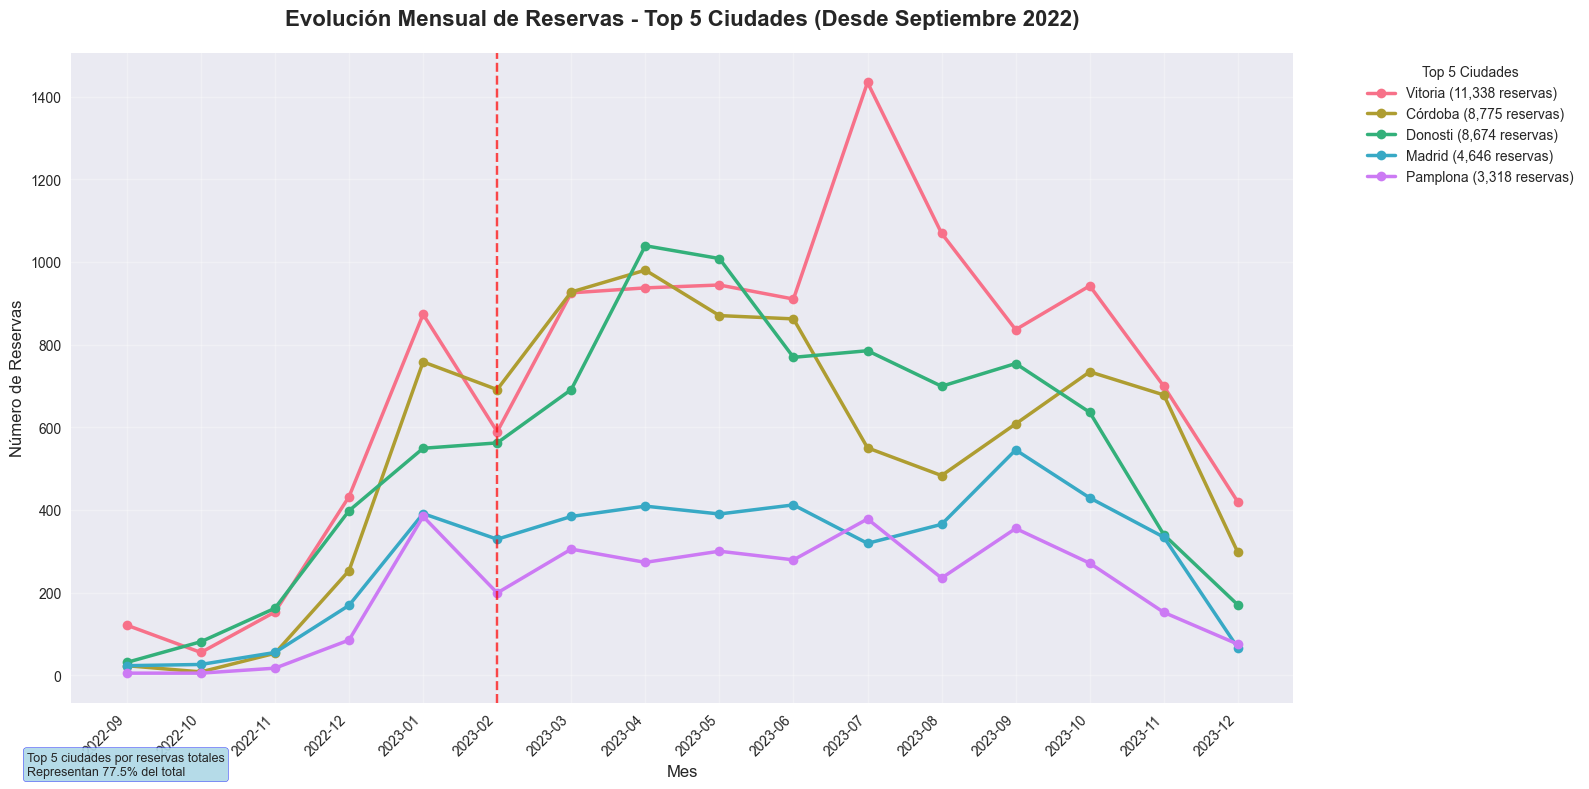

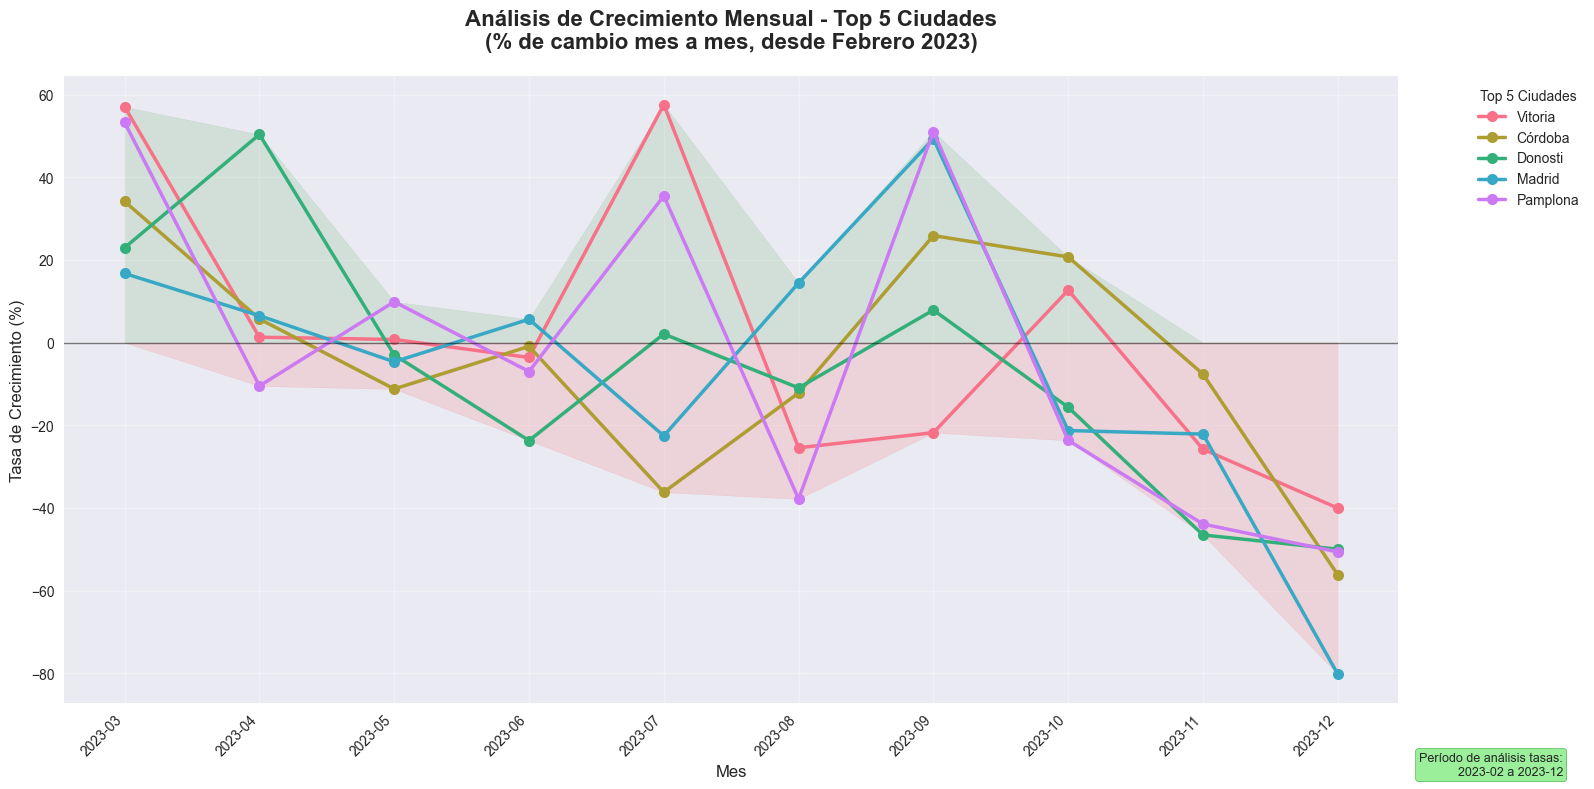


ANÁLISIS DETALLADO DEL TOP 5 CIUDADES:

1. CRECIMIENTO PROMEDIO (desde Feb 2023):
----------------------------------------
1. Vitoria: +1.3%
2. Pamplona: -2.4%
3. Córdoba: -3.8%
4. Madrid: -5.8%
5. Donosti: -6.7%

2. ANÁLISIS DE VOLATILIDAD:
------------------------------
Córdoba: 27.8% (MODERADA volatilidad)
Donosti: 30.3% (ALTA volatilidad)
Vitoria: 33.5% (ALTA volatilidad)
Madrid: 34.3% (ALTA volatilidad)
Pamplona: 38.6% (ALTA volatilidad)

3. CONSISTENCIA (porcentaje de meses con crecimiento):
--------------------------------------------------
Vitoria: 50.0% de meses con crecimiento (MEJORABLE)
Madrid: 50.0% de meses con crecimiento (MEJORABLE)
Córdoba: 40.0% de meses con crecimiento (MEJORABLE)
Donosti: 40.0% de meses con crecimiento (MEJORABLE)
Pamplona: 40.0% de meses con crecimiento (MEJORABLE)

RECOMENDACIONES ESTRATÉGICAS PARA EL TOP 5:

🌟 MEJOR DESEMPEÑO: Vitoria
   Crecimiento promedio: +1.3%
   Recomendación: Invertir en expansión/capacidad

📊 MÁS ESTABLE: Córdoba
   Vola

In [39]:
# Convertir booked_at a datetime si no está ya convertido
df['booked_at'] = pd.to_datetime(df['booked_at'], format='%b %d, %Y, %H:%M', errors='coerce')

# Filtrar datos desde septiembre 2022
fecha_inicio = pd.Timestamp('2022-09-01')
df_filtrado = df[df['booked_at'] >= fecha_inicio].copy()

# Crear columna de mes y año para agrupación
df_filtrado['mes_año'] = df_filtrado['booked_at'].dt.to_period('M')
df_filtrado['mes_año_str'] = df_filtrado['mes_año'].astype(str)

# Agrupar por mes y ciudad
reservas_por_mes_ciudad = df_filtrado.groupby(['mes_año', 'ciudad']).size().unstack(fill_value=0)

# Ordenar los meses cronológicamente
reservas_por_mes_ciudad = reservas_por_mes_ciudad.sort_index()

# IDENTIFICAR LOS 5 MEJORES HOTELES (por reservas totales)
print("\n" + "="*80)
print("IDENTIFICANDO LOS 5 MEJORES HOTELES:")
print("="*80)

# Calcular total de reservas por ciudad
total_reservas_por_ciudad = reservas_por_mes_ciudad.sum()

# Ordenar ciudades por reservas totales (de mayor a menor)
ciudades_ordenadas = total_reservas_por_ciudad.sort_values(ascending=False)

print("\nRanking de ciudades por reservas totales (desde Sep 2022):")
print("-" * 50)
for i, (ciudad, total) in enumerate(ciudades_ordenadas.items(), 1):
    print(f"{i}. {ciudad}: {total:,} reservas")

# Seleccionar las 5 mejores ciudades
top_5_ciudades = ciudades_ordenadas.head(5).index.tolist()
top_5_totales = ciudades_ordenadas.head(5).values.tolist()

print(f"\n{'='*60}")
print("TOP 5 CIUDADES SELECCIONADAS PARA ANÁLISIS:")
print(f"{'='*60}")
for i, (ciudad, total) in enumerate(zip(top_5_ciudades, top_5_totales), 1):
    print(f"{i}. {ciudad}: {total:,} reservas ({(total/total_reservas_por_ciudad.sum()*100):.1f}% del total)")
print(f"{'='*60}")

# Filtrar datos solo para las 5 mejores ciudades
reservas_top5 = reservas_por_mes_ciudad[top_5_ciudades]

# PRIMER GRÁFICO: EVOLUCIÓN DE LAS 5 MEJORES CIUDADES
plt.figure(figsize=(16, 8))

# Crear paleta de colores específica para las 5 mejores
palette_top5 = sns.color_palette("husl", 5)

# Trazar una línea para cada ciudad del top 5
for i, ciudad in enumerate(top_5_ciudades):
    plt.plot(reservas_top5.index.astype(str), 
             reservas_top5[ciudad], 
             marker='o', 
             label=f"{ciudad} ({top_5_totales[i]:,} reservas)",
             color=palette_top5[i],
             linewidth=2.5)

# Personalizar el gráfico
plt.title('Evolución Mensual de Reservas - Top 5 Ciudades (Desde Septiembre 2022)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Reservas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Top 5 Ciudades', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Agregar línea vertical para marcar inicio del análisis de tasas
fecha_corte = pd.Period('2023-02', 'M')
if fecha_corte in reservas_top5.index:
    corte_idx = list(reservas_top5.index).index(fecha_corte)
    plt.axvline(x=corte_idx, color='red', linestyle='--', alpha=0.7, 
                label='Inicio análisis tasas (Feb 2023)')

# Agregar nota informativa
nota_top5 = "Top 5 ciudades por reservas totales\n"
nota_top5 += f"Representan {(sum(top_5_totales)/total_reservas_por_ciudad.sum()*100):.1f}% del total"
plt.figtext(0.02, 0.02, nota_top5,
            ha='left', va='bottom',
            fontsize=9,
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.9, edgecolor='blue'),
            transform=plt.gcf().transFigure)

plt.tight_layout()
plt.show()

# PREPARAR DATOS PARA SEGUNDO GRÁFICO (tasas desde febrero 2023)
fecha_inicio_tasas = pd.Period('2023-02', 'M')
reservas_top5_desde_feb2023 = reservas_top5[reservas_top5.index >= fecha_inicio_tasas].copy()

# Verificar que tenemos datos suficientes
if len(reservas_top5_desde_feb2023) > 1:  # Necesitamos al menos 2 meses para tasas
    # CALCULAR TASAS DE CRECIMIENTO PARA LAS 5 MEJORES
    tasas_crecimiento_top5 = pd.DataFrame()
    
    for ciudad in top_5_ciudades:
        datos_ciudad = reservas_top5_desde_feb2023[ciudad]
        # Calcular tasa de crecimiento mensual (%)
        tasa = datos_ciudad.pct_change() * 100
        tasas_crecimiento_top5[ciudad] = tasa
    
    # Eliminar primera fila (sin tasa calculable)
    tasas_crecimiento_top5 = tasas_crecimiento_top5.iloc[1:]
    
    if len(tasas_crecimiento_top5) > 0:
        # SEGUNDO GRÁFICO: TASAS DE CRECIMIENTO DE LAS 5 MEJORES
        plt.figure(figsize=(16, 8))
        
        # Trazar una línea para cada ciudad del top 5 (misma paleta)
        for i, ciudad in enumerate(top_5_ciudades):
            if ciudad in tasas_crecimiento_top5.columns:
                plt.plot(tasas_crecimiento_top5.index.astype(str), 
                         tasas_crecimiento_top5[ciudad], 
                         marker='o', 
                         label=ciudad,
                         color=palette_top5[i],
                         linewidth=2.5,
                         markersize=8)
        
        # Personalizar el gráfico
        plt.title('Análisis de Crecimiento Mensual - Top 5 Ciudades\n(% de cambio mes a mes, desde Febrero 2023)', 
                  fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Mes', fontsize=12)
        plt.ylabel('Tasa de Crecimiento (%)', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Top 5 Ciudades', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        
        # Línea horizontal en 0% como referencia
        plt.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
        
        # Agregar áreas sombreadas
        plt.fill_between(tasas_crecimiento_top5.index.astype(str), 
                         0, 
                         np.maximum(tasas_crecimiento_top5.max(axis=1), 0), 
                         alpha=0.1, 
                         color='green',
                         label='Crecimiento positivo')
        
        plt.fill_between(tasas_crecimiento_top5.index.astype(str), 
                         0, 
                         np.minimum(tasas_crecimiento_top5.min(axis=1), 0), 
                         alpha=0.1, 
                         color='red',
                         label='Crecimiento negativo')
        
        # Agregar nota sobre período de análisis
        nota_periodo = f"Período de análisis tasas:\n{reservas_top5_desde_feb2023.index.min()} a {reservas_top5_desde_feb2023.index.max()}"
        plt.figtext(0.98, 0.02, nota_periodo,
                    ha='right', va='bottom',
                    fontsize=9,
                    bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.9, edgecolor='green'),
                    transform=plt.gcf().transFigure)
        
        plt.tight_layout()
        plt.show()
        
        # ANÁLISIS DETALLADO DEL TOP 5
        print("\n" + "="*80)
        print("ANÁLISIS DETALLADO DEL TOP 5 CIUDADES:")
        print("="*80)
        
        # 1. Comparación de crecimiento promedio
        print("\n1. CRECIMIENTO PROMEDIO (desde Feb 2023):")
        print("-" * 40)
        
        crecimiento_promedio_top5 = []
        for ciudad in top_5_ciudades:
            if ciudad in tasas_crecimiento_top5.columns:
                tasas = tasas_crecimiento_top5[ciudad].dropna()
                if len(tasas) > 0:
                    crecimiento_promedio = tasas.mean()
                    crecimiento_promedio_top5.append((ciudad, crecimiento_promedio))
        
        # Ordenar por crecimiento promedio
        crecimiento_promedio_top5.sort(key=lambda x: x[1], reverse=True)
        
        for i, (ciudad, crecimiento) in enumerate(crecimiento_promedio_top5, 1):
            print(f"{i}. {ciudad}: {crecimiento:+.1f}%")
        
        # 2. Estabilidad vs Volatilidad
        print("\n2. ANÁLISIS DE VOLATILIDAD:")
        print("-" * 30)
        
        volatilidad_top5 = []
        for ciudad in top_5_ciudades:
            if ciudad in tasas_crecimiento_top5.columns:
                tasas = tasas_crecimiento_top5[ciudad].dropna()
                if len(tasas) > 0:
                    volatilidad = tasas.std()
                    volatilidad_top5.append((ciudad, volatilidad))
        
        volatilidad_top5.sort(key=lambda x: x[1])
        
        for ciudad, volatilidad in volatilidad_top5:
            if volatilidad < 15:
                nivel = "BAJA"
            elif volatilidad < 30:
                nivel = "MODERADA"
            else:
                nivel = "ALTA"
            print(f"{ciudad}: {volatilidad:.1f}% ({nivel} volatilidad)")
        
        # 3. Ranking de consistencia (meses positivos)
        print("\n3. CONSISTENCIA (porcentaje de meses con crecimiento):")
        print("-" * 50)
        
        consistencia_top5 = []
        for ciudad in top_5_ciudades:
            if ciudad in tasas_crecimiento_top5.columns:
                tasas = tasas_crecimiento_top5[ciudad].dropna()
                if len(tasas) > 0:
                    meses_positivos = (tasas > 0).sum()
                    porcentaje_positivo = (meses_positivos / len(tasas)) * 100
                    consistencia_top5.append((ciudad, porcentaje_positivo))
        
        consistencia_top5.sort(key=lambda x: x[1], reverse=True)
        
        for ciudad, porcentaje in consistencia_top5:
            if porcentaje > 70:
                nivel = "EXCELENTE"
            elif porcentaje > 50:
                nivel = "BUENA"
            else:
                nivel = "MEJORABLE"
            print(f"{ciudad}: {porcentaje:.1f}% de meses con crecimiento ({nivel})")
        
        # 4. Recomendaciones estratégicas
        print("\n" + "="*80)
        print("RECOMENDACIONES ESTRATÉGICAS PARA EL TOP 5:")
        print("="*80)
        
        # Ciudad con mejor crecimiento
        if crecimiento_promedio_top5:
            mejor_ciudad, mejor_crecimiento = crecimiento_promedio_top5[0]
            print(f"\n🌟 MEJOR DESEMPEÑO: {mejor_ciudad}")
            print(f"   Crecimiento promedio: {mejor_crecimiento:+.1f}%")
            print(f"   Recomendación: Invertir en expansión/capacidad")
        
        # Ciudad más estable
        if volatilidad_top5:
            ciudad_estable, volatilidad = volatilidad_top5[0]
            print(f"\n📊 MÁS ESTABLE: {ciudad_estable}")
            print(f"   Volatilidad: {volatilidad:.1f}%")
            print(f"   Recomendación: Modelo predecible, ideal para planificación")
        
        # Ciudad más consistente
        if consistencia_top5:
            ciudad_consistente, consistencia = consistencia_top5[0]
            print(f"\n🎯 MÁS CONSISTENTE: {ciudad_consistente}")
            print(f"   {consistencia:.1f}% de meses con crecimiento")
            print(f"   Recomendación: Base sólida para crecimiento sostenido")
        
        # Análisis de tendencias recientes
        print("\n" + "="*80)
        print("TENDENCIAS RECIENTES (últimos 3 meses):")
        print("="*80)
        
        if len(tasas_crecimiento_top5) >= 3:
            ultimos_3_meses = tasas_crecimiento_top5.iloc[-3:]
            
            for ciudad in top_5_ciudades:
                if ciudad in ultimos_3_meses.columns:
                    tendencia_reciente = ultimos_3_meses[ciudad].mean()
                    print(f"\n{ciudad}:")
                    print(f"  Crecimiento promedio últimos 3 meses: {tendencia_reciente:+.1f}%")
                    
                    if tendencia_reciente > 10:
                        print(f"  → TENDENCIA: ACELERANDO")
                    elif tendencia_reciente > 0:
                        print(f"  → TENDENCIA: MANTENIENDO")
                    else:
                        print(f"  → TENDENCIA: DESACELERANDO")
        
    else:
        print("\n¡ADVERTENCIA: No hay suficientes datos para calcular tasas del Top 5!")
        
else:
    print(f"\n¡ADVERTENCIA: No hay suficientes datos del Top 5 desde febrero 2023!")
    print(f"Se necesitan al menos 2 meses de datos después de febrero 2023.")

print("\n" + "="*80)
print("RESUMEN DEL ANÁLISIS TOP 5:")
print("="*80)
print(f"1. Ciudades analizadas: {', '.join(top_5_ciudades)}")
print(f"2. Período histórico: {reservas_top5.index.min()} a {reservas_top5.index.max()}")
print(f"3. Período tasas: {reservas_top5_desde_feb2023.index.min()} a {reservas_top5_desde_feb2023.index.max()}")
print(f"4. Representación total: {(sum(top_5_totales)/total_reservas_por_ciudad.sum()*100):.1f}% de todas las reservas")
print("="*80)